# Analysis of Lending Club's Loan Data

##### Analysis Done By

Name: **Arunkumar Gunasekaran**

Batch: **ML C57**  Assignment: **Lending Club Case Study**

Email: manigunasekaran30@gmail.com



## Table of Contents
1. [Problem Statement](#Problem-Statement)
   - [Business Objective](#Business-Objective)
2. [Data Sourcing](#Data-Sourcing)
3. [Data Preparation](#Data-Preparation)
   - [Data Understanding](#Data-Understanding)
       - [Importing Required Libraries and Configuration](#Importing-Required-Libraries-and-Configuration)
       - [Loading csv from local](#Loading-csv-from-local)
       - [Understanding Structure of dataset](#Understanding-Structure-of-dataset)
   - [Dataset Quality Check](#Dataset-Quality-Check)
       - [Missing values on Columns](#Missing-values-on-Columns)
       - [Data Quality checks on rows](#Data-Quality-checks-on-rows)
       - [Outlier Check](#Outlier-Check)
   - [Data Cleaning and Manipulation](#Data-Cleaning-and-Manipulation)
       - [Missing value treatment for columns](#Missing-value-treatment-for-columns)
       - [Missing value treatment for Rows](#Missing-value-treatment-for-Rows)
       - [Dropping Constant and Unique Columns](#Dropping-Constant-and-Unique-Columns)
       - [Outlier-Treatment](#Outlier-Treatment)
       - [Dropping-irrelevant-columns](#Dropping-irrelevant-columns)
       - [Fix Incorrect Data Types](#Fix-Incorrect-Data-Types)
       - [Derived Metrics](#Derived-Metrics)
 4. [Analysis](#Analysis)
    - [Univariate Analysis](#Univariate-Analysis)
       - [univariate analysis on outcome](#univariate-analysis-on-outcome)
       - [Univarite analysis on categorical variables](#Univarite-analysis-on-categorical-variables)
       - [Univarite analysis on continuous variables](#Univarite-analysis-on-continuous-variables)
       - [Univariate analysis with binned columns](#Univarite-analysis-with-binned-columns)
    - [Segmented Univariate Analysis](#Segmented-Univariate-Analysis)
       - [Segmented univariate analysis on categorical variables by loan_status](#Segmented-univariate-analysis-on-continuous-variables-by-loan_status)
       - [Segmented univariate analysis on categorical variables by loan_status](#Segmented-univariate-analysis-on-continuous-variables-by-loan_status)
    - [BiVariate Analysis](#BiVariate-Analysis)
       - [Bivariate Analysis on Numerical Variables](#Bivariate-Analysis-on-Numerical-Variables)
       - [Rate of Default vs Categorical Variables](#Rate-of-Default-vs-Categorical-Variables)
       - [Bivariate Analysis Continuous vs Categorical variables](##Bivariate-Analysis-Continuous-vs-Categorical-variables)
    - [MutiVariate Analysis](#MutiVariate-Analysis)
 5. [Conclusions](#conclusions)

## Problem Statement

The Lending Club is a consumer finance company which provides loan to urban consumer. The company receives the application from the consumer, Company has to make decision whether to **Approve/Reject** the Request.

There are two types of Risk
1. If the applicant is likely to repay the loan, then not approving the loan results in **a loss of business** to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to **a financial loss** for the company

As an ML Engineer need to **perform EDA** on customer loan data to understand how **consumer attributes and loan attributes** influence the tendency of default.So the company can mitigate two type of risk mentioned above.

### Business Objective

- To identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate 
- To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Data Sourcing

**Private data** as been collected from the Lending Club Customer in form of **csv** containing the complete loan data for all loans issued through the time period 2007 t0 2011.

## Data Preparation

### Data Understanding

#### Importing Required Libraries and Configuration

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') #supress warnings
# setting max columns and rows to visualize the data frame
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

#### Loading csv from local

In [2]:
loan_dataset = pd.read_csv("loan.csv")

In [3]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Understanding Structure of dataset

In [4]:
# checking the shape of the data
loan_dataset.shape

(39717, 111)

In [5]:
#checking data types
loan_dataset.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [6]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


The Provided Dataset has **39717** rows and **111** columns

loan_status is the outcome columns needs to predicted against other exploratory variables
 - loan_status = "Charged Off" Means Customer has been defaulted
- loan_status = "Fully Paid" Means Customer successfully paid

This is Binary problem we need find variables that influencing the probality of loan_status = "Charged Off"

Let's check data distribution of given data set

In [7]:
loan_dataset["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<font color='green'>Observation</font>
1. There is a imbalance between Fully Paid and Charged Off in the data set provided
2. Dataset also includes "current" in data set, that needs to be removed as this case study needs analyis binary problem between "Charged Off" and "Fully Paid"


In [8]:
outcome_Values = ["Fully Paid","Charged Off"]
loan_dataset=loan_dataset[loan_dataset["loan_status"].isin(outcome_Values)]

In [9]:
loan_dataset["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [10]:
loan_dataset.shape

(38577, 111)

In [11]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


**updated dataset includes 38577 rows and 111 columns** 

### Dataset Quality Check

#### Missing values on Columns

In [12]:
# Checking columns with missing percentage
missing_columns_df = pd.DataFrame(100*loan_dataset.isnull().mean(),columns=["Missing_Percentage"]).sort_values(by="Missing_Percentage")
missing_columns_df

,Missing_Percentage
id,0.000000
earliest_cr_line,0.000000
inq_last_6mths,0.000000
open_acc,0.000000
pub_rec,0.000000
revol_bal,0.000000
total_acc,0.000000
initial_list_status,0.000000
out_prncp,0.000000
out_prncp_inv,0.000000


<font color='green'>Observation</font>
 Seems like most columns missing 100% values, Let's print the columns names sperately to visualize better

In [13]:
print("Columns with no missing values")
columns_no_missing_values = missing_columns_df[missing_columns_df["Missing_Percentage"]==0].index
print(columns_no_missing_values)
print("*********************************************************************")
print("Columns with 100% missing values")
print(missing_columns_df[missing_columns_df["Missing_Percentage"]==100].index)
print("*********************************************************************")
print("Columns with 50 to 100 missing values")
print(missing_columns_df[(missing_columns_df["Missing_Percentage"]<100) & (missing_columns_df["Missing_Percentage"]>50)].index)
print("*********************************************************************")
print("Columns with 0 to 50 missing values")
print(missing_columns_df[(missing_columns_df["Missing_Percentage"]<50) & (missing_columns_df["Missing_Percentage"]>0)].index)

Columns with no missing values
Index(['id', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'delinq_2yrs', 'total_pymnt', 'delinq_amnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'total_pymnt_inv', 'dti',
       'total_rec_prncp', 'zip_code', 'member_id', 'addr_state', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc', 'loan_amnt', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'verification_status', 'purpose'],
      dtype='object')
*********************************************************************
Columns with 100% missing values
Index(['mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       '

<font color='green'>Observation</font>
 1. Columns missing 100% values will not be useful for our anlysis we can Drop them
 2. Two Columns missing values more than 50% we can drop this as well

In [14]:
# calculate missing value columns beyond certain threshold

In [15]:
missig_value_cutOff_percentage = 50
missing_value_columns = missing_columns_df[(missing_columns_df["Missing_Percentage"]>50)].index
print(missing_value_columns.size)
missing_value_columns

57


Index(['mths_since_last_delinq', 'mths_since_last_record', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_tl_op_past_12m', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'num_il_tl',
       'mo_sin_rcnt_rev_tl_op', 'verification_status_joint',
       'mo_sin_old_il_acct', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'total_bc_limit', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'mo_sin_old_rev_tl_op',
       'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util

#### Data Quality checks on rows

In [16]:
# checking missing values on rows
100*loan_dataset.isnull().mean(axis=1).sort_values(0)

18754    49.549550
6365     49.549550
22598    49.549550
25176    49.549550
34052    49.549550
           ...    
4714     54.954955
39714    54.954955
11282    54.954955
39660    55.855856
39659    55.855856
Length: 38577, dtype: float64

<font color='green'>Observation</font>
1. We can see mostly 50% percent of the data missing on each row. It because of high number of columns having 100% missing values
2. As we drop missing columns, rows missing percentage will be rectified

In [17]:
# checking for duplicate rows
duplicate_rows_loan_dataset = loan_dataset[loan_dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_loan_dataset.shape)

number of duplicate rows:  (0, 111)


<font color='green'>Observation</font>
1. No Duplicate rows observed

#### Outlier Check

In [18]:
loan_dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,0.0,38577.0,0.0,0.0,0.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38521.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37880.000000,38538.0,0.0,0.0,0.0,0.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043479,0.0,NaN,NaN,NaN,NaN
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204583,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.564230

<font color='green'>Observation</font>
1. From the above describe table We can see columns 'funded_amnt','funded_amnt_inv','annual_inc','loan_amnt','installment' 
has significant jump from 75 to max there might be outlier at this columns
2. Let's plot a boxplot to confirm this

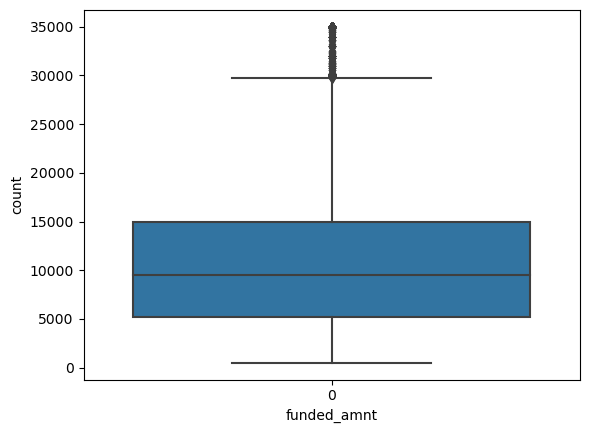

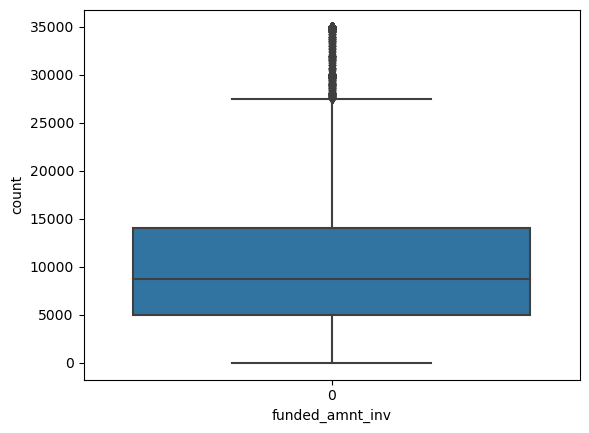

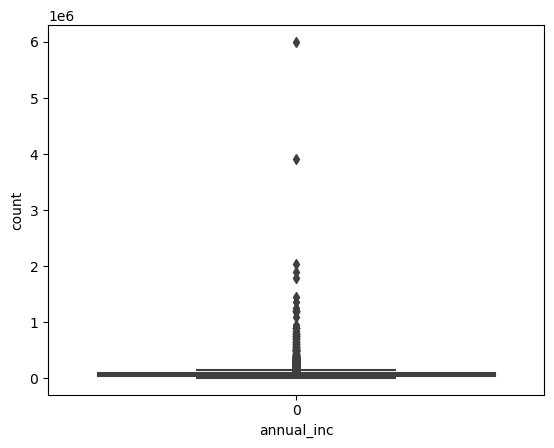

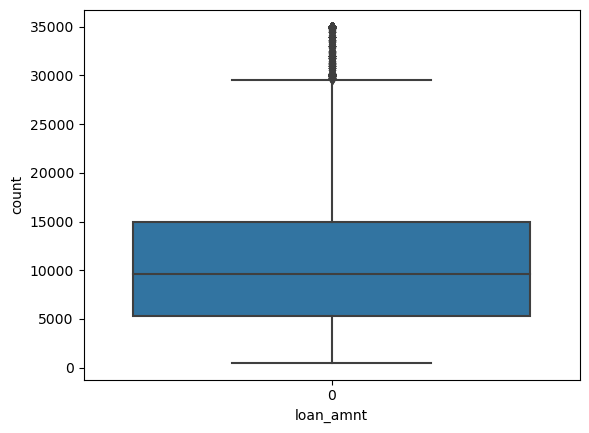

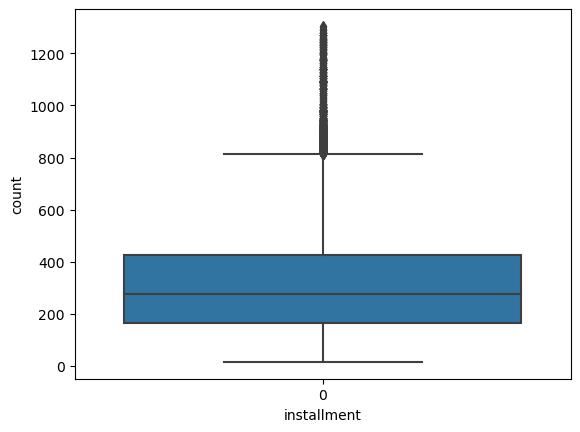

In [19]:
outliers_clumns = ['funded_amnt','funded_amnt_inv','annual_inc','loan_amnt','installment']
for i in outliers_clumns:
    if loan_dataset[i].dtype == "int64" or loan_dataset[i].dtype == "float64":
       ax = sns.boxplot(loan_dataset[i])
       ax.set(ylabel='count', xlabel=i)
       plt.show()

<font color='green'>Observation</font>
1. From the above box plot we can observe there are extreme outliers at the 'annual_inc' column
2. Outlier exists on other columns as well

### Data Cleaning and Manipulation

#### Missing value treatment for columns

In [20]:
#drop all columns missing more than 50% values
loan_dataset=loan_dataset.drop(columns=missing_value_columns)

In [21]:
loan_dataset.shape

(38577, 54)

In [22]:
# re-checking missing values on columns
pd.DataFrame(100*loan_dataset.isnull().mean(),columns=["Missing_Percentage"]).sort_values(by="Missing_Percentage")


,Missing_Percentage
id,0.000000
inq_last_6mths,0.000000
open_acc,0.000000
pub_rec,0.000000
revol_bal,0.000000
total_acc,0.000000
initial_list_status,0.000000
out_prncp,0.000000
out_prncp_inv,0.000000
total_pymnt,0.000000


### Missing value treatment for Rows

In [23]:
100*loan_dataset.isnull().mean(axis=1).sort_values(0)

20428     0.000000
31725     0.000000
17974     0.000000
17973     0.000000
17972     0.000000
           ...    
39710     9.259259
39700     9.259259
39704     9.259259
39715    11.111111
39714    11.111111
Length: 38577, dtype: float64

In [24]:
loan_dataset.isnull().sum(axis=1).sort_values(0)

20428    0
31725    0
17974    0
17973    0
17972    0
        ..
39710    5
39700    5
39704    5
39715    6
39714    6
Length: 38577, dtype: int64

<font color='green'>Observation</font>
1. Missing values on rows is lesser after droppig the missing value columns

In [25]:
#re-checking the shape
loan_dataset.shape

(38577, 54)

####  Dropping Constant and Unique Columns

In [26]:
# identifying Constant Colunms
# Constant columns only have one unique value which doesn't provide much insight during anlysis

In [27]:
constant_columns = loan_dataset.columns[loan_dataset.nunique()==1]
constant_columns

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [28]:
loan_dataset=loan_dataset.drop(columns=constant_columns)

In [29]:
loan_dataset.shape

(38577, 43)

In [30]:
# identifying Unique Colunms
# Unique does not have any duplicates, this are usually system indetifier like id,member_id,uniqueurl
#which doesn't provide much insight during anlysis

In [31]:
unique_columns = loan_dataset.columns[loan_dataset.nunique()==loan_dataset.shape[0]]
unique_columns

Index(['id', 'member_id', 'url'], dtype='object')

In [32]:
loan_dataset=loan_dataset.drop(columns=unique_columns)

In [33]:
loan_dataset.shape

(38577, 40)

In [34]:
loan_dataset.columns.sort_values()

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
       'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'verification_status',
       'zip_code'],
      dtype='object')

#### Outlier Treatment

In [35]:
#removing outlier from the annual income
loan_dataset["annual_inc"]=loan_dataset["annual_inc"].div(1000).round(3).abs()
q1 = loan_dataset["annual_inc"].quantile(0.25)
q3 = loan_dataset["annual_inc"].quantile(0.75)
IQR = q3-q1
upperlimit = q3+(IQR * 1.5)
#finding percentage of outlier at the dataset
(loan_dataset["annual_inc"]>upperlimit).sum()/len(loan_dataset["annual_inc"]) * 100

4.567488399823729

In [36]:
# removing all outliers

<Axes: >

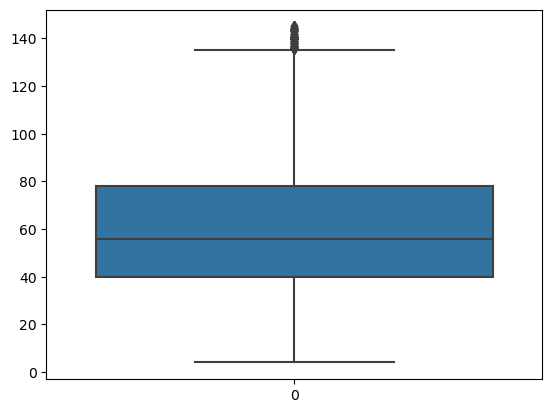

In [37]:
loan_dataset = loan_dataset[loan_dataset["annual_inc"]<upperlimit]
sns.boxplot(loan_dataset["annual_inc"])

####  Dropping irrelevant columns

In [38]:
unique_value_count_df =pd.DataFrame(loan_dataset.nunique(),columns=["unique_count"]).sort_values(by="unique_count")
unique_value_count_df

,unique_count
term,2
loan_status,2
pub_rec_bankruptcies,3
verification_status,3
pub_rec,5
home_ownership,5
grade,7
inq_last_6mths,9
delinq_2yrs,11
emp_length,11


 
1. "desc","title","emp_title" - Categorical column with higher unique values can result high cardinality issue. desc can be used for sentiment analysis like numbers of positive and negative words But for this analysis we can ignore it
2. 'collection_recovery_fee', 'recoveries','total_pymnt', 'total_pymnt_inv', 'total_rec_int','total_rec_late_fee',
'total_rec_prncp', 'last_pymnt_amnt', 'last_pymnt_d','revol_bal', 'revol_util' - **Availalble Post Sactioning the Loan**

In [39]:
irrelevant_Columns =["desc","title","emp_title",'collection_recovery_fee', 'recoveries','total_pymnt', 'total_pymnt_inv', 'total_rec_int','total_rec_late_fee',
'total_rec_prncp', 'last_pymnt_amnt', 'last_pymnt_d','revol_bal', 'revol_util','earliest_cr_line','last_credit_pull_d']
loan_dataset=loan_dataset.drop(columns=irrelevant_Columns)

In [40]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36754 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36754 non-null  int64  
 1   funded_amnt           36754 non-null  int64  
 2   funded_amnt_inv       36754 non-null  float64
 3   term                  36754 non-null  object 
 4   int_rate              36754 non-null  object 
 5   installment           36754 non-null  float64
 6   grade                 36754 non-null  object 
 7   sub_grade             36754 non-null  object 
 8   emp_length            35739 non-null  object 
 9   home_ownership        36754 non-null  object 
 10  annual_inc            36754 non-null  float64
 11  verification_status   36754 non-null  object 
 12  issue_d               36754 non-null  object 
 13  loan_status           36754 non-null  object 
 14  purpose               36754 non-null  object 
 15  zip_code           

<font color='green'>Observation</font>
1. Seems like int_rate,issue_d having incorrect dtypes

#### Fix Incorrect Data Types

In [41]:
loan_dataset["int_rate"].value_counts().sort_values(0)

15.01%      1
16.15%      1
18.72%      1
14.67%      1
17.90%      1
         ... 
7.88%     704
13.49%    722
11.49%    760
7.51%     769
10.99%    866
Name: int_rate, Length: 370, dtype: int64

<font color='green'>Observation</font>
1. emp_length is quantitative variables
2. Need to remove the % at the end to fix data type

In [42]:
#removing percent charector at the end conveting to float
loan_dataset["int_rate"] = loan_dataset["int_rate"].apply(lambda x: float(x[:-1]))

In [43]:
loan_dataset["int_rate"].dtype

dtype('float64')

In [44]:
#converting issue_d string to datetime
from datetime import datetime
loan_dataset['issue_d'] = loan_dataset['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [45]:
print(loan_dataset["issue_d"].dtype)

datetime64[ns]


In [46]:
# using the below script to generate the high level meta decription
# so it can be used to 
# categorize the columns and indentify the column to derive
# classify variables into categorical and  continuous
meta_datas = []
for column in loan_dataset.columns:
    value_count_df = loan_dataset[column].value_counts()
    meta_datas.append(
        {
            'ColumnName': column,
            'Description':"",
            'dtype':  loan_dataset[column].dtype,
            'missing': loan_dataset[column].isna().sum(),
            'Unique': value_count_df.index.size,
            'Top': value_count_df.iloc[:3].to_frame().to_json(),
            'Bottom': value_count_df.iloc[-3:].to_frame().to_json()
        }
    )

pd.DataFrame(meta_datas).to_csv('meta_data_description.csv')

#### Derived Metrics

In [47]:
# from issue_d column we can derive the month and year column
loan_dataset["issue_d_month"] = loan_dataset["issue_d"].dt.month
loan_dataset["issue_d_year"] = loan_dataset["issue_d"].dt.year

In [48]:
# deriving outcome column so we can perform sum and count on it as with text on loan_staus we can't do much
loan_dataset["outcome"] = loan_dataset["loan_status"]=="Charged Off"

In [49]:
loan_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,outcome
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24.000,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1,3,0,9,0.0,12,2011,False
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30.000,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,5,3,0,4,0.0,12,2011,True
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12.252,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2,2,0,10,0.0,12,2011,False
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49.200,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1,10,0,37,0.0,12,2011,False
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36.000,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,3,9,0,12,0.0,12,2011,False


<font color='green'>Comments</font>
1. we can further derive the binned columns for continuous variable to perform categorical analysis
2. we can do this post univariate analysis after analysing important continuous variable

## Analysis

### Univariate Analysis

#### univariate analysis on outcome
  

Text(0.5, 0, 'defaulted')

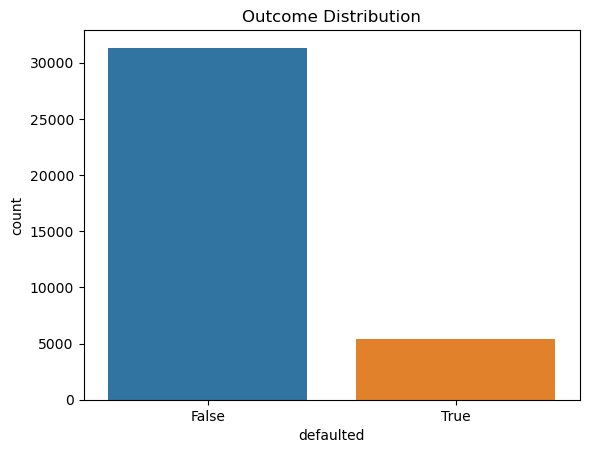

In [50]:
sns.countplot(x=loan_dataset["outcome"])
plt.title("Outcome Distribution")
plt.xlabel("defaulted")

In [51]:
loan_dataset["outcome"].mean() *100

14.771181368014366

<font color='green'>Insights</font>
1. 15% of the loan application is defaulted

In [52]:
#following columns are identified as key columns for analysis
categorical_variables = ["term","grade","sub_grade","emp_length","home_ownership","purpose","verification_status","issue_d_month","issue_d_year",
"addr_state","zip_code","inq_last_6mths","delinq_2yrs","pub_rec","pub_rec_bankruptcies"]
continuous_variables = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","open_acc",
"total_acc"]

####  Univarite analysis on categorical variables

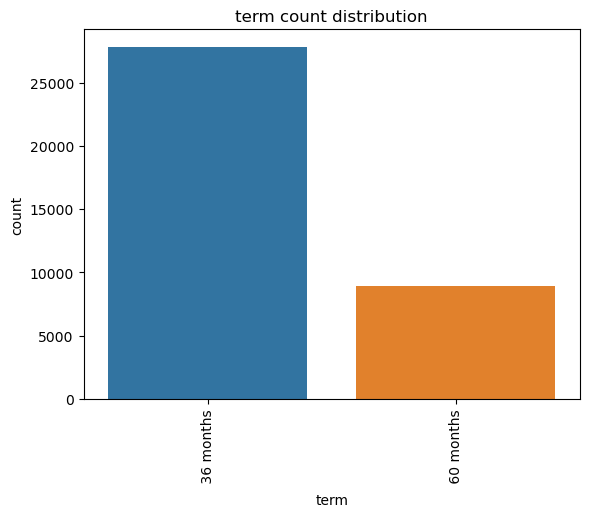

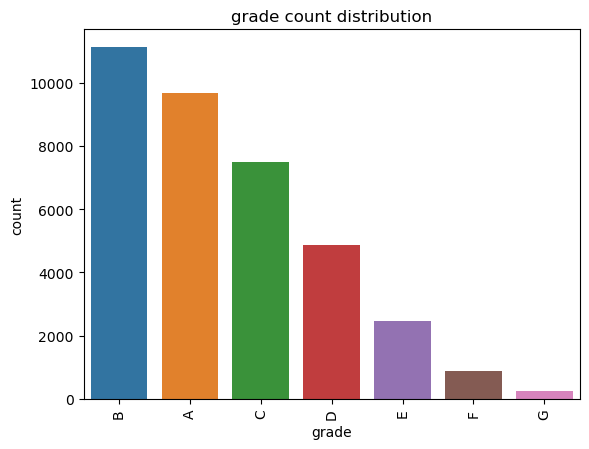

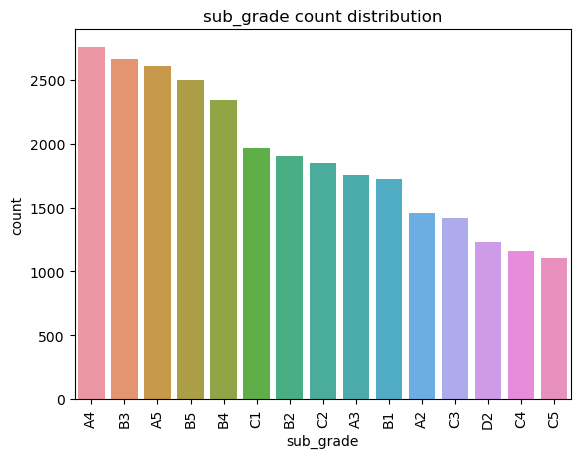

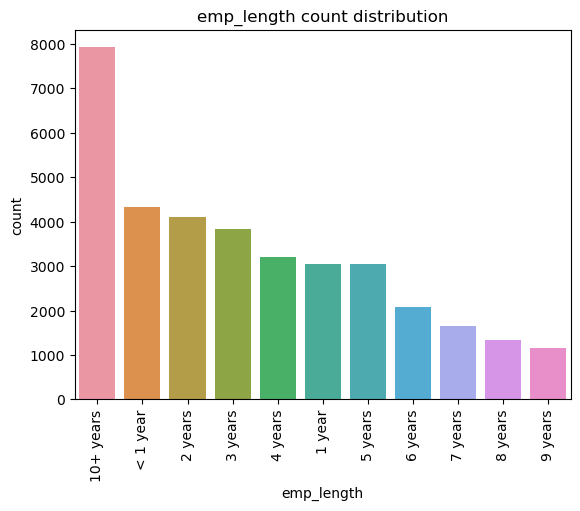

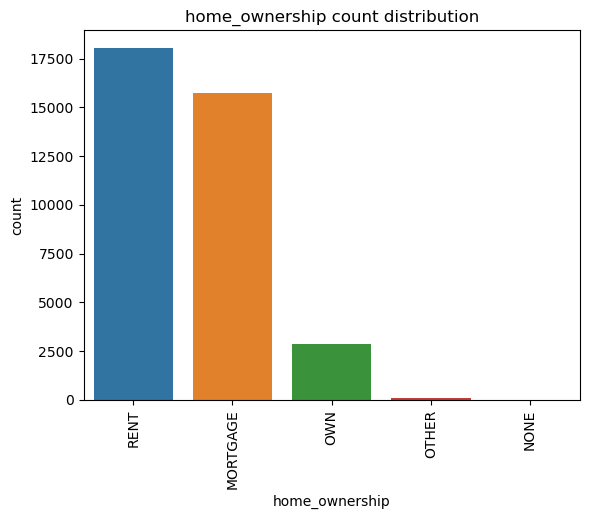

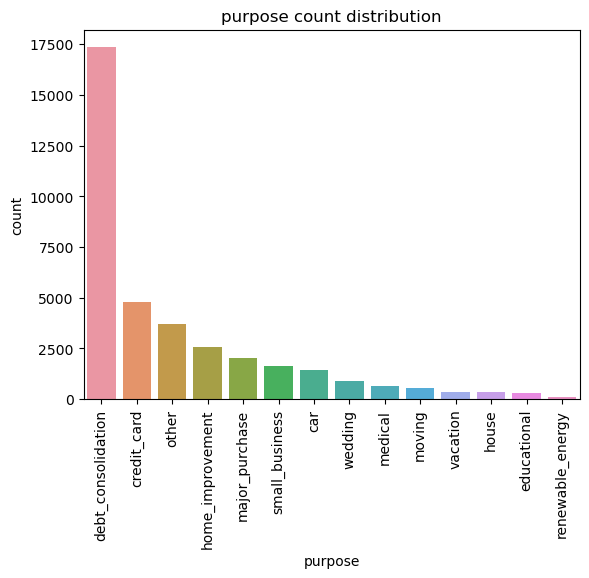

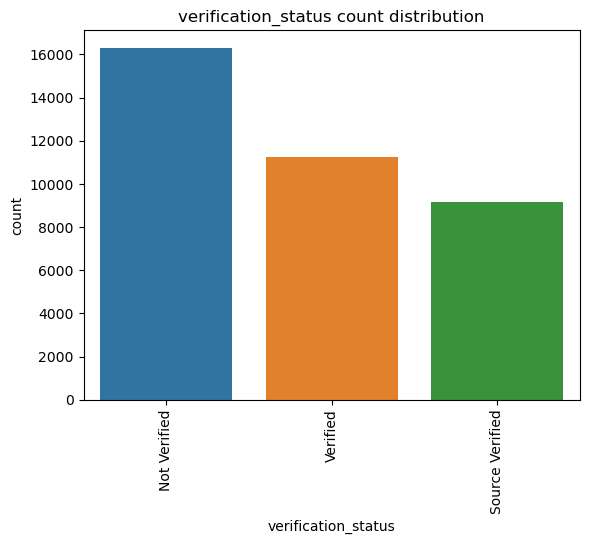

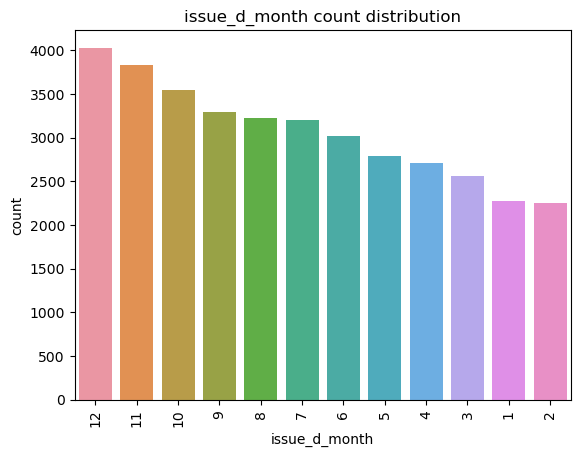

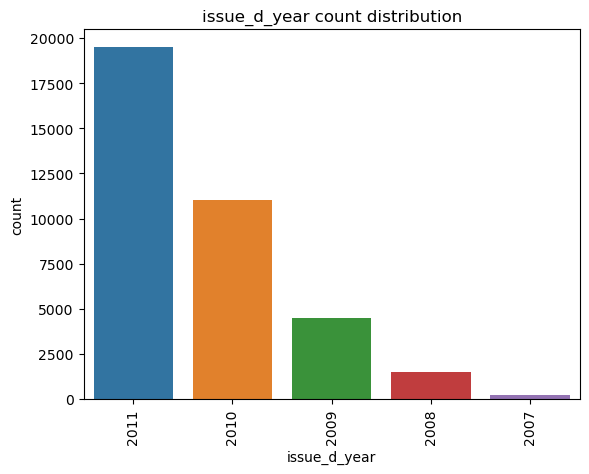

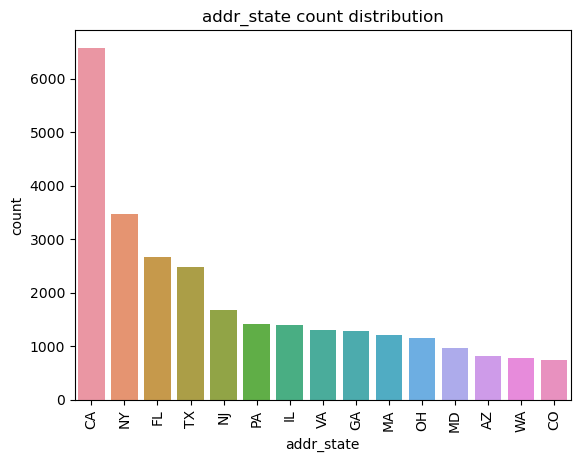

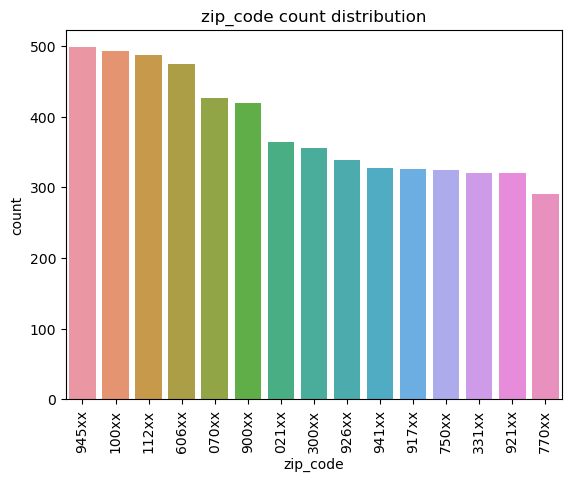

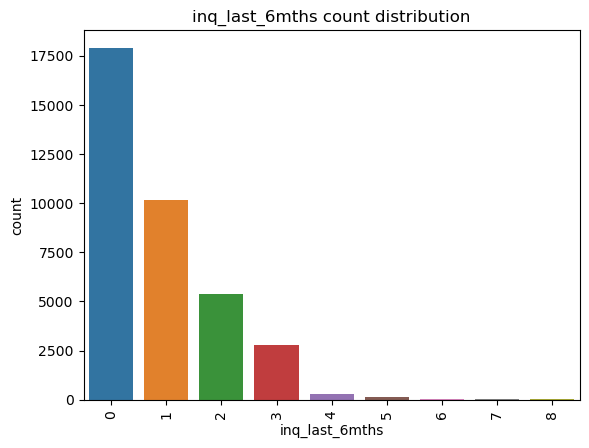

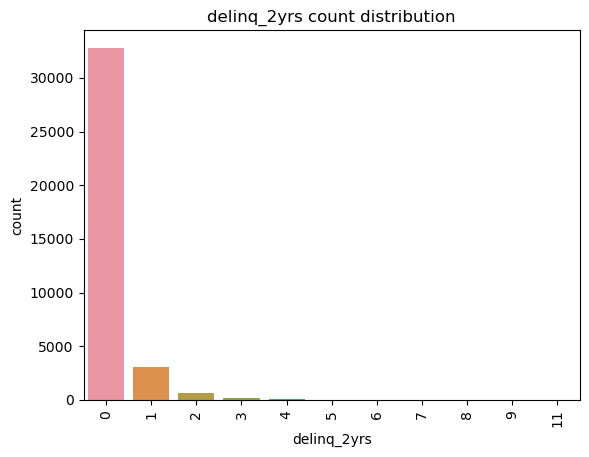

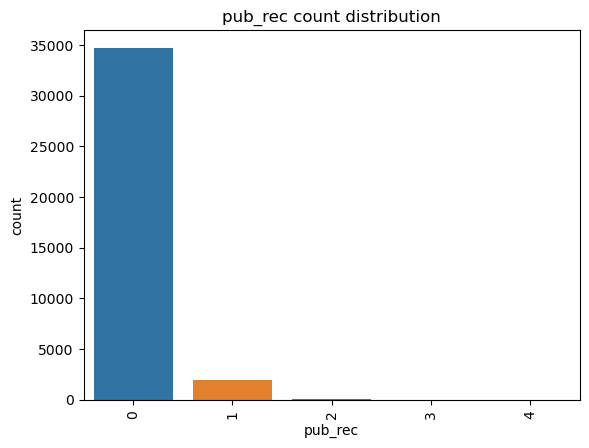

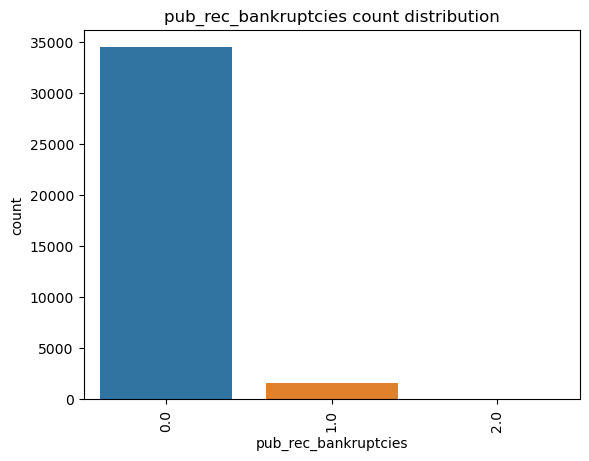

In [53]:
#plotting count plot for categorical_variables
for column in categorical_variables:
    s=loan_dataset[column].value_counts()
    sns.countplot(x=loan_dataset[column],order=s.iloc[:15].index)
    plt.xticks(rotation=90) 
    plt.title(column+ ' count distribution')
    plt.show()


<font color='green'>Insights</font>
 1. **term** - More loans are taken for 36 months term 
 2. **grade,sub_grde** - More Loans given with Loan grades B, A, C. If we drill down more A4, B3, A5, B5,B4, C1 are the top sub grades
 3. **emp_length** - More people applying for loan with 10+ years and 0 to 3 years experience
 4. **home_ownership** - . People own the house the doesn't apply for loan much compared to rented and mortgage people!
 5. **purpose** -Most loans are taken for the purpose of debt_consolidation, credit_card, home_improvement
 6. **verification_status** - Most of the loan application falls in not “Not verified” category
 7. **issue_d_month** - Most Loans taken at the end of the year at Dec, Nov, Oct
 8. **issue_d_year** - Number of loans taken steadily increasing over the years, This might be due to the company getting popularity and growth
 9. **addr_state** - Most loans taken at states California, New York, Florida, Texas


#### univariate analysis on continuous variables

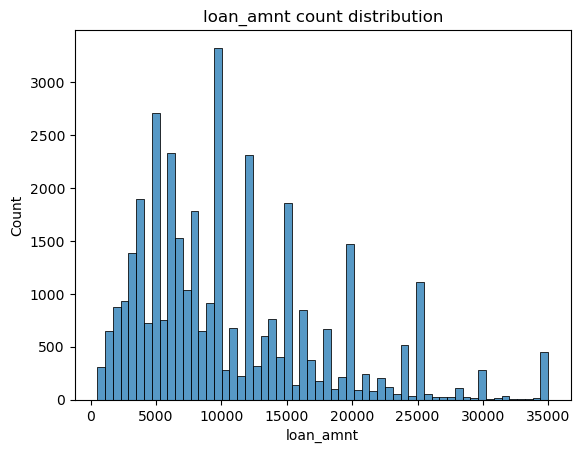

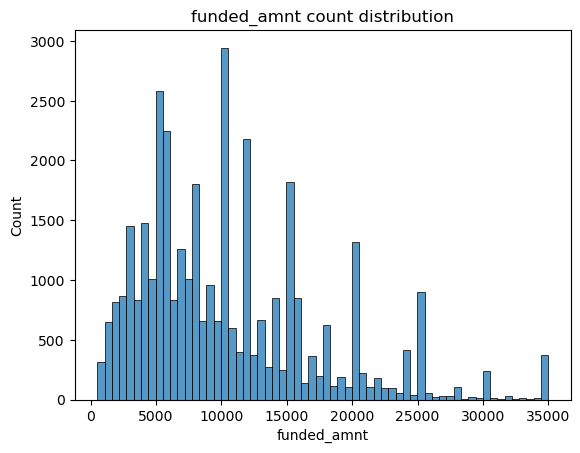

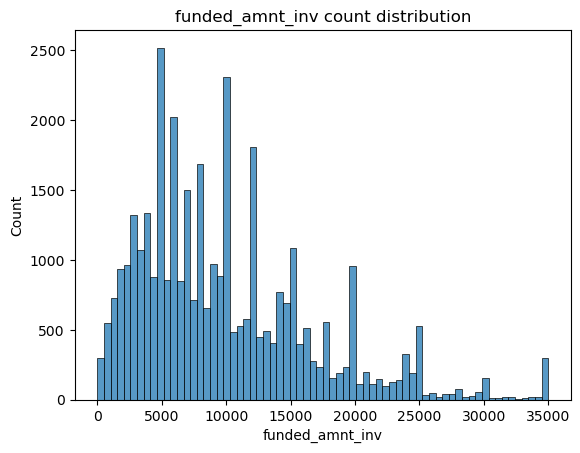

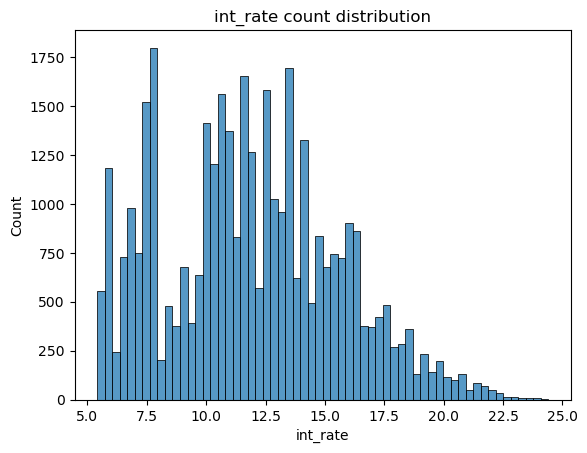

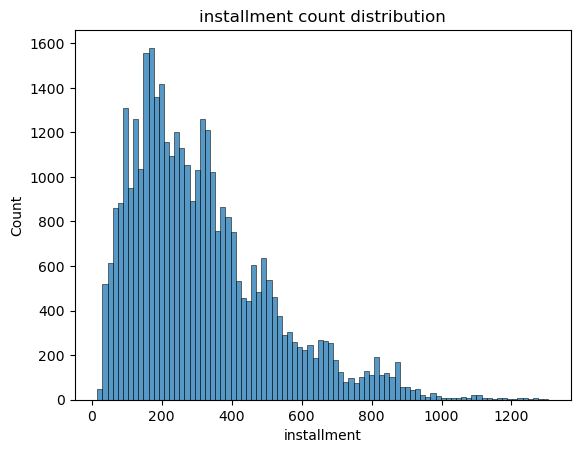

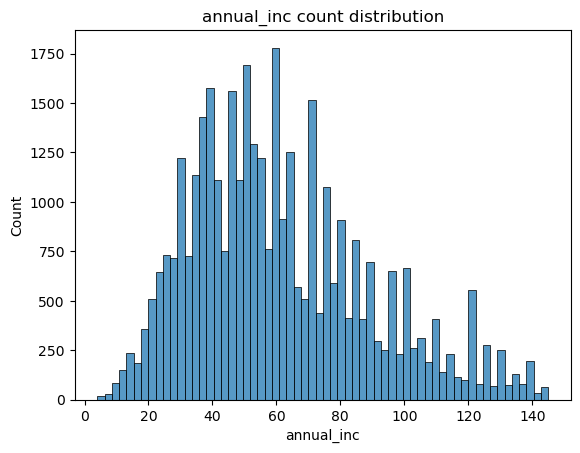

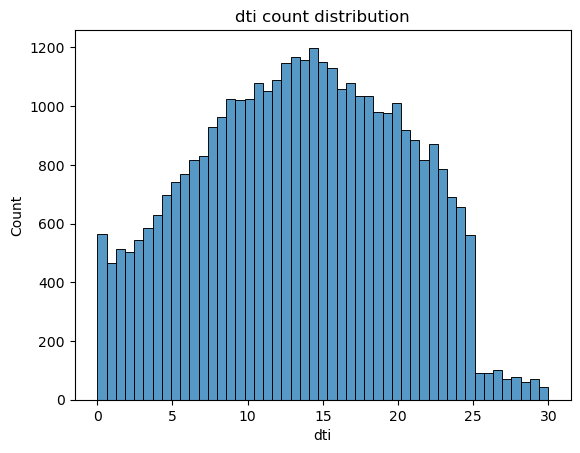

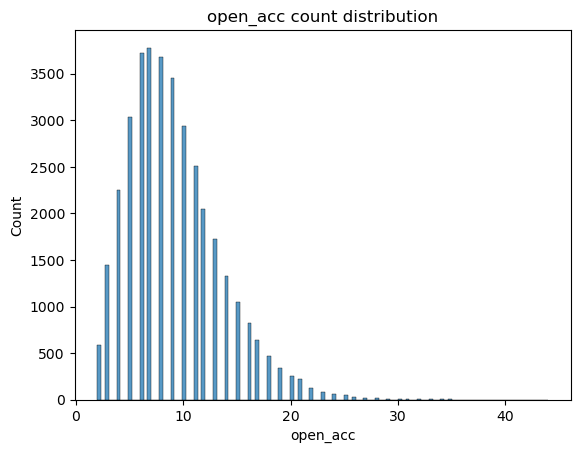

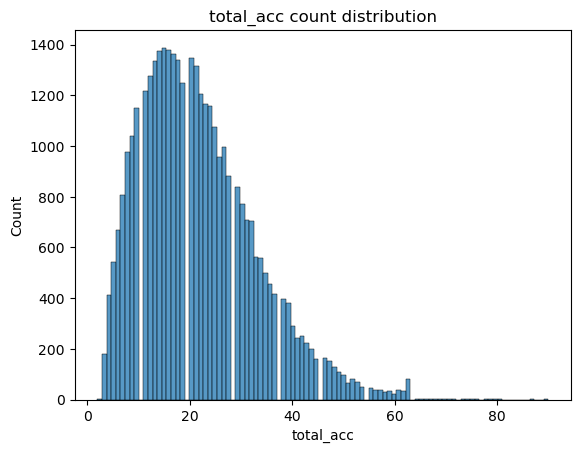

In [54]:
for column in continuous_variables:
    sns.histplot(loan_dataset[column])
    plt.title(column+ ' count distribution')
    plt.show()

<font color='green'>Insights</font>
1. Loan amount, funded amount, investor funded amount more loan present in the range 5000 to 15000, Also Spikes explains that most of the loans are taken as multiple of 5000
2. More loan having interest rate between 10 to 15 %
3. More people taking loans at the income range of 40 to 80 K
4. Loans are concentrated with 100 to 400 range installment amount
5. Most Loans having dti 10 to 20
6. Total accounts gradually increase till 20 then drops
7. Open accounts gradually increase till 10 then drops

To get better insights let's bin the above columns

#### Univariate analysis with binned columns

In [55]:
#creating binned columns for amount variables
def binAmountColumns(amt):
    if amt<5000:
        return "low"
    elif amt>=5000 and amt<15000:
        return "meidum"
    elif amt>=15000 and amt<25000:
        return "high"
    elif amt>=25000:
        return "very high"
    
loan_dataset["loan_amnt_bins"] = loan_dataset["loan_amnt"].apply(binAmountColumns)
loan_dataset["funded_amnt_bins"] = loan_dataset["funded_amnt"].apply(binAmountColumns)
loan_dataset["funded_amnt_inv_bins"] = loan_dataset["funded_amnt_inv"].apply(binAmountColumns)

In [56]:
#creating binned columns for int_rate variables
def binRateColumns(rate):
    if rate<10:
        return "low"
    elif rate>=10 and rate<15:
        return "meidum"
    elif rate>=15 and rate<20:
        return "high"
    elif rate>=20:
        return "very high"
    
loan_dataset["int_rate_bins"] = loan_dataset["int_rate"].apply(binRateColumns)

In [57]:
#creating binned columns for installment variables
def binInstallmentColumns(installment):
    if installment<200:
        return "low"
    elif installment>=200 and installment<400:
        return "meidum"
    elif installment>=400 and installment<600:
        return "high"
    elif installment>=600:
        return "very high"
    
loan_dataset["installment_bins"] = loan_dataset["installment"].apply(binInstallmentColumns)

In [58]:
#creating binned columns for annual_inc variables
def binAnnualIncomeColumns(annualincome):
    if annualincome<40:
        return "low"
    elif annualincome>=40 and annualincome<80:
        return "meidum"
    elif annualincome>=80 and annualincome<120:
        return "high"
    elif annualincome>=120:
        return "very high"
    
loan_dataset["annual_inc_bins"] = loan_dataset["annual_inc"].apply(binAnnualIncomeColumns)

In [59]:
#creating binned columns for dti variables
def binDtiColumns(dti):
    if dti<5:
        return "low"
    elif dti>=5 and dti<10:
        return "meidum"
    elif dti>=10 and dti<15:
        return "high"
    elif dti>=15:
        return " very high"
    
loan_dataset["dti_bins"] = loan_dataset["dti"].apply(binDtiColumns)

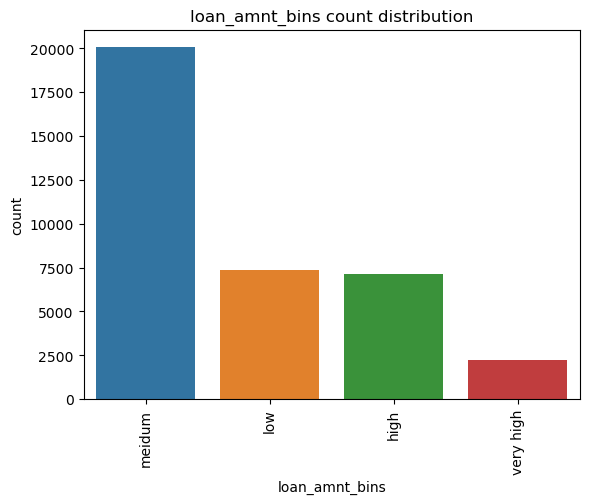

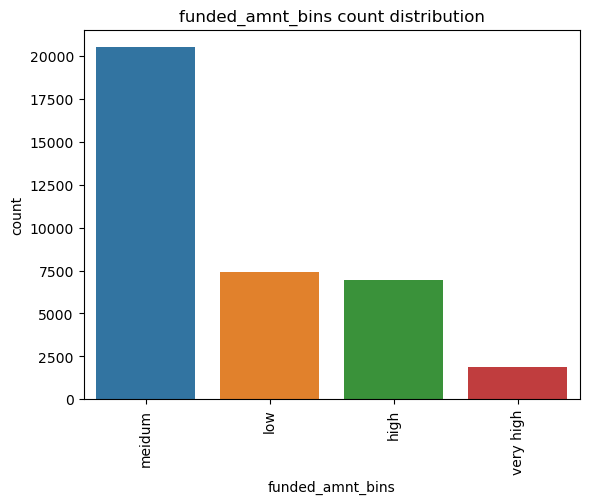

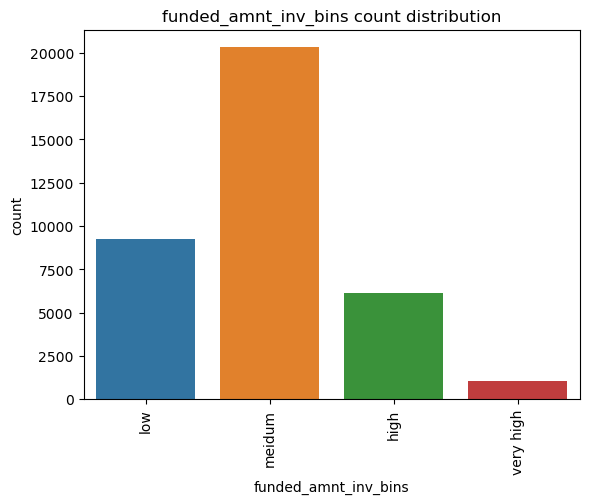

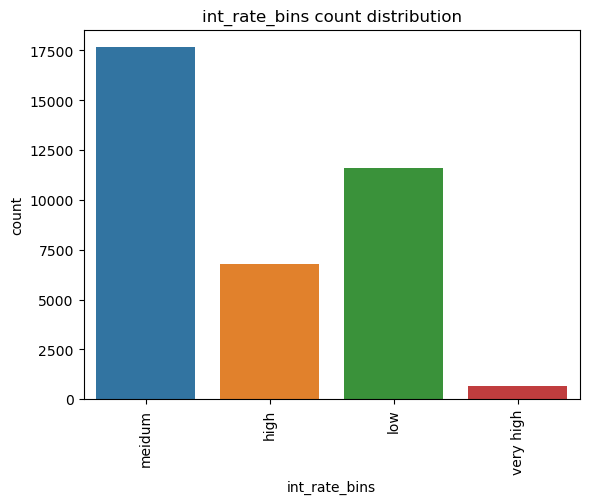

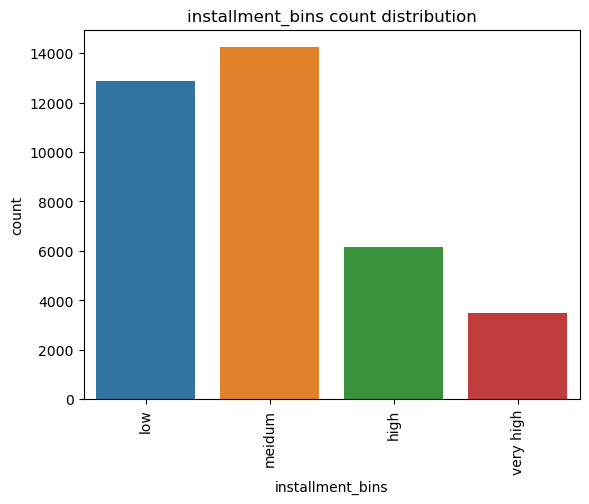

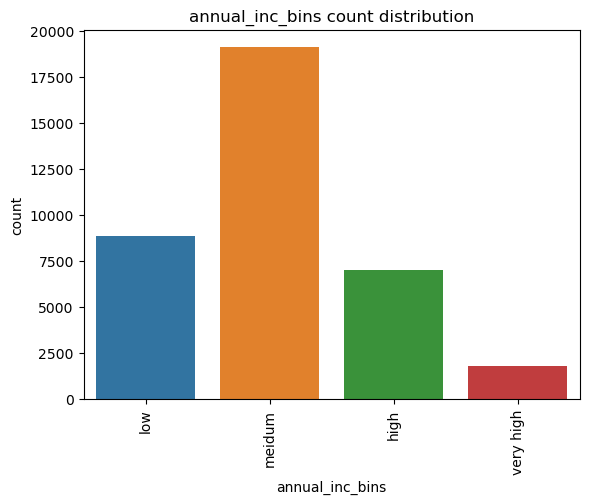

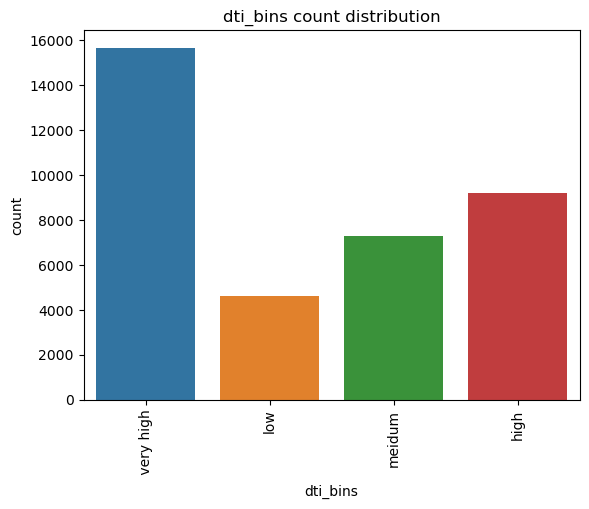

In [60]:
binned_columns =["loan_amnt_bins","funded_amnt_bins","funded_amnt_inv_bins","int_rate_bins",
                 "installment_bins","annual_inc_bins","dti_bins"]
#plotting count plot for categorical_variables
for column in binned_columns:
    s=loan_dataset[column].value_counts()
    sns.countplot(x=loan_dataset[column])
    plt.xticks(rotation=90) 
    plt.title(column+ ' count distribution')
    plt.show()

<font color='green'>Insights</font>
 1. Loan amount, funded amount, funded amount investor – More loans taken for medium value of amount
 2. funded amount investor – investors fund medium loans for decent return and low for safe return compared to high and low
 3. More Loans given at medium interest rate category
 4. Most people takes loan are at medium annual income category
 5. Most loans are given at medium and low installment amount
 6. Most loan taken have vey high dti

### Segmented Univariate Analysis

#### Segmented univariate analysis on categorical variables by loan_status

In [61]:
# ploting stacked bar charts segmented by 


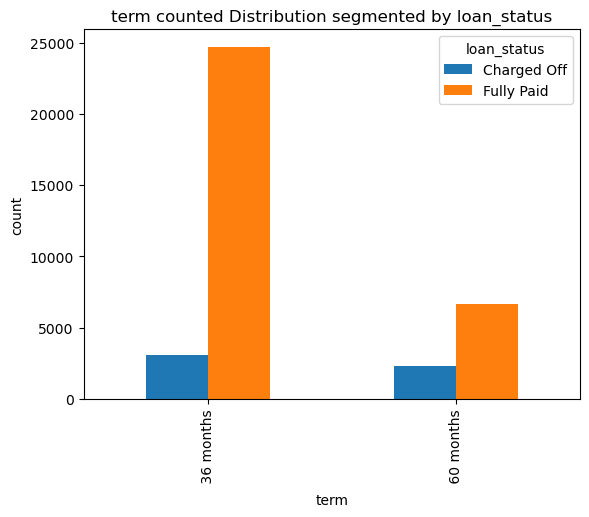

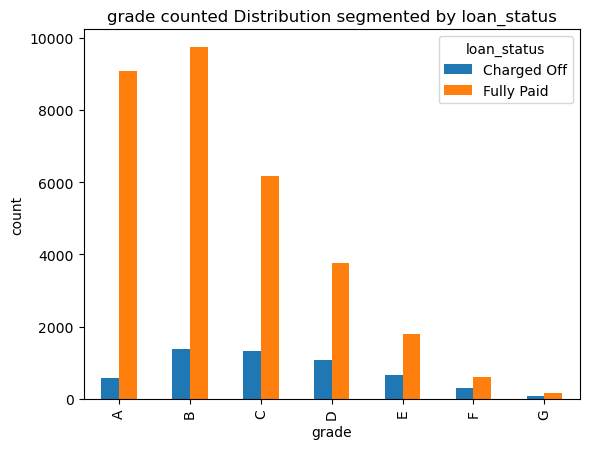

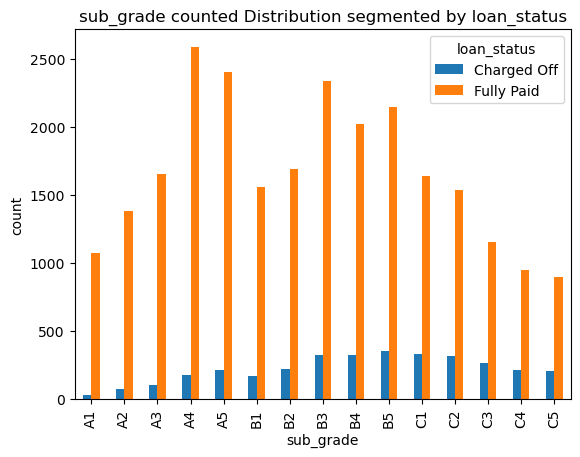

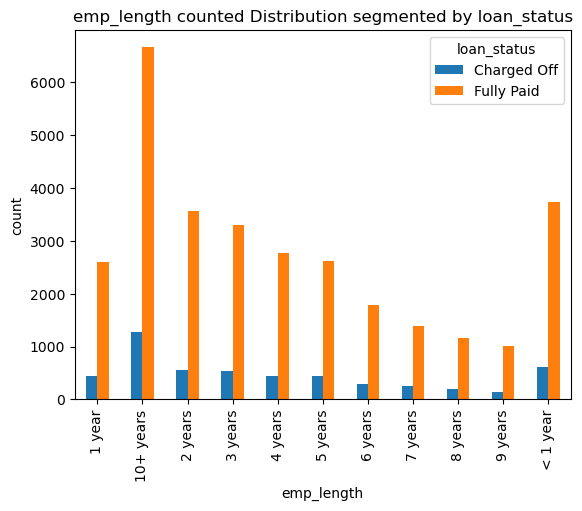

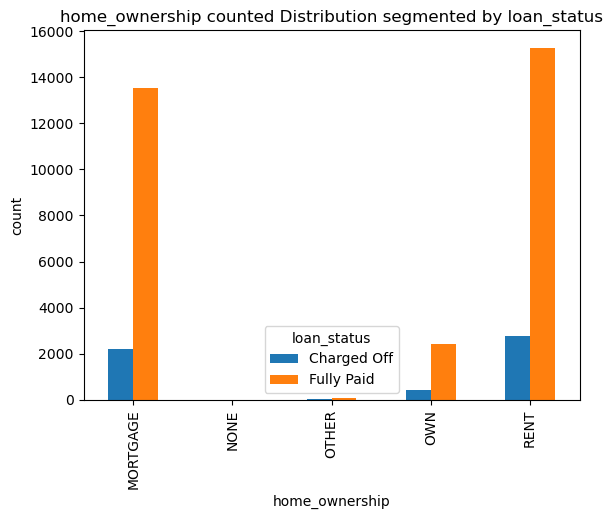

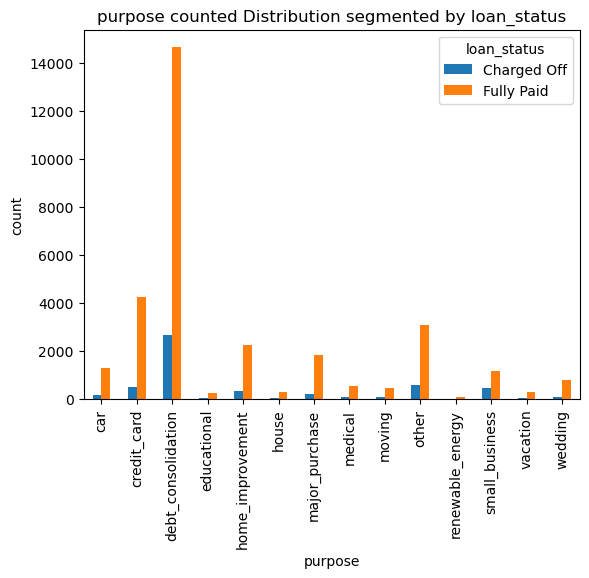

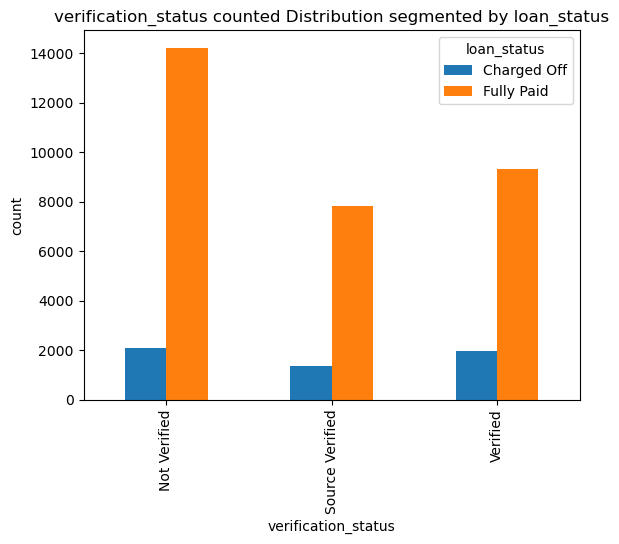

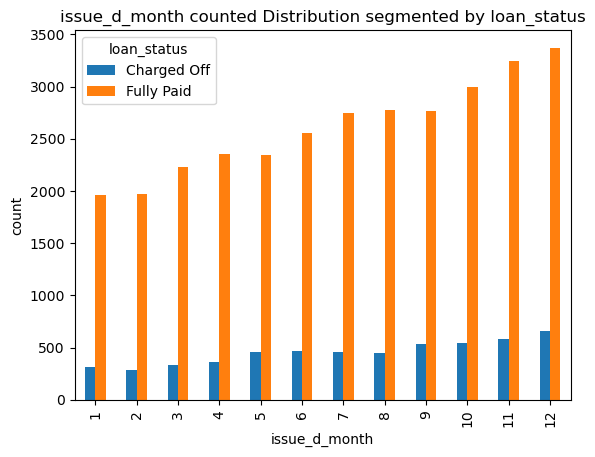

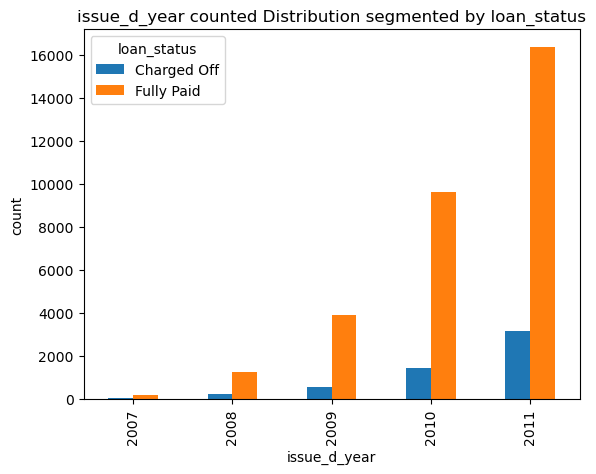

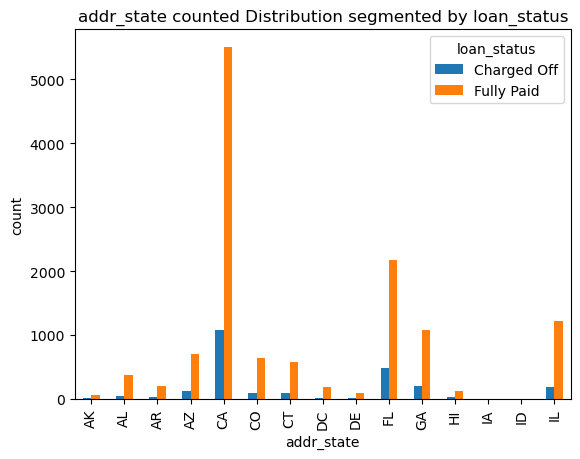

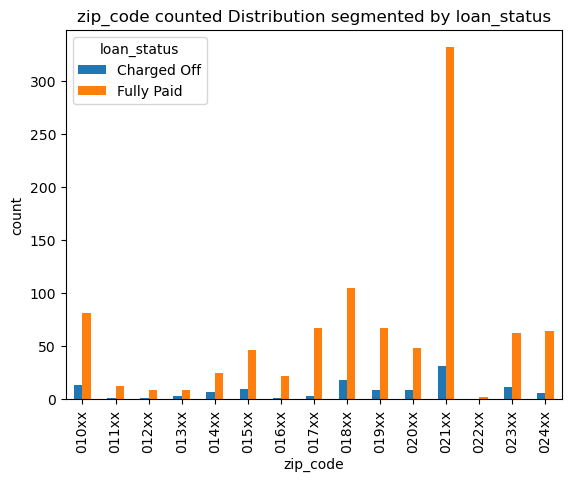

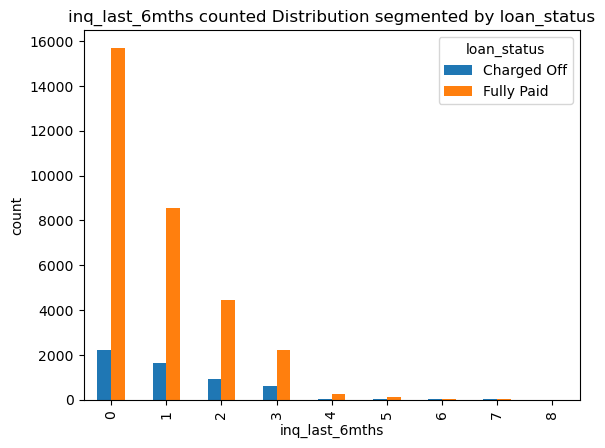

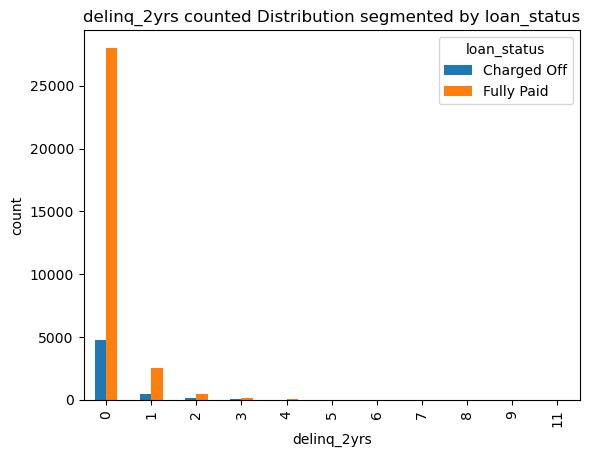

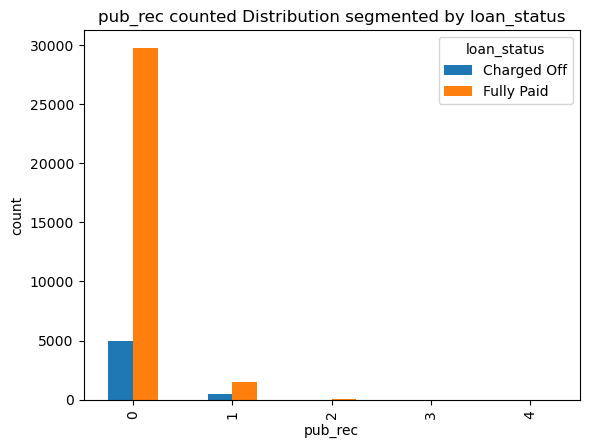

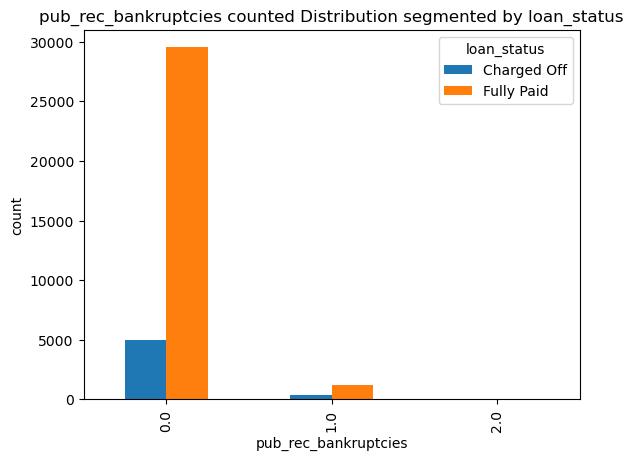

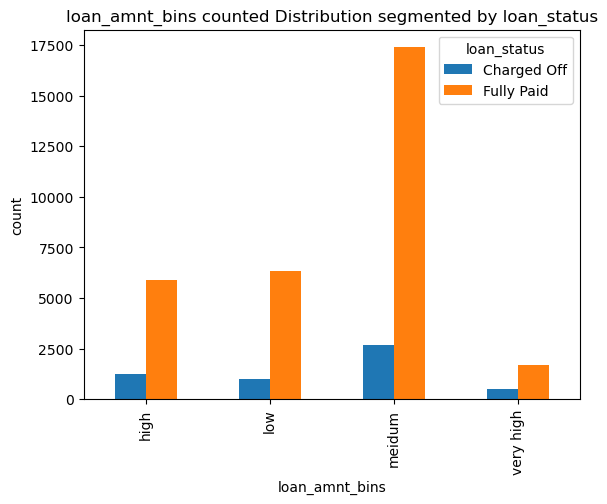

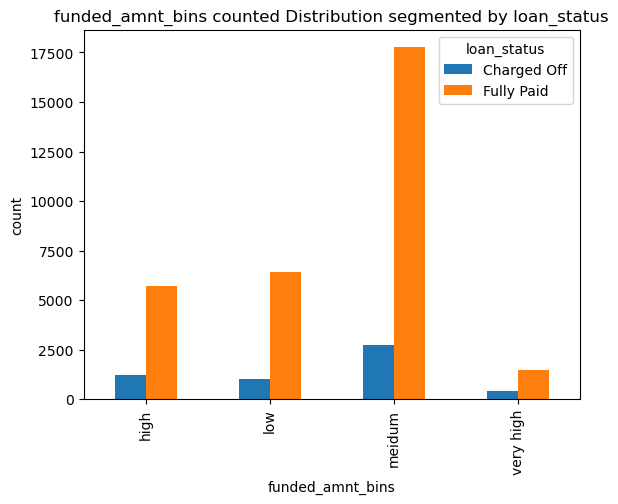

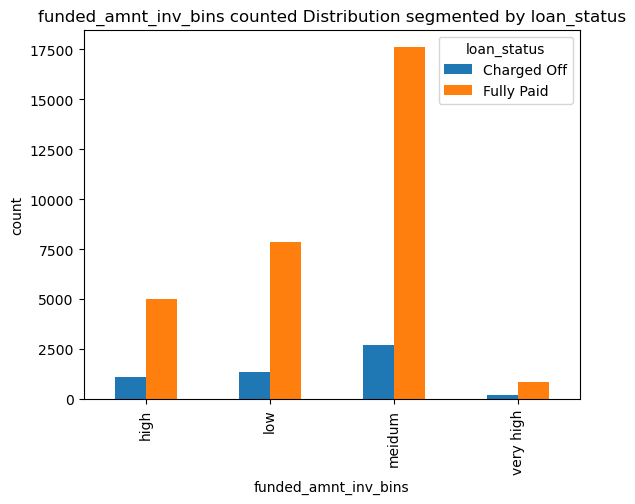

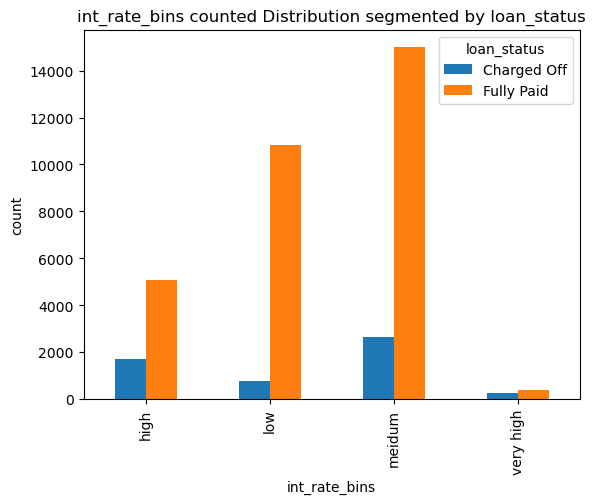

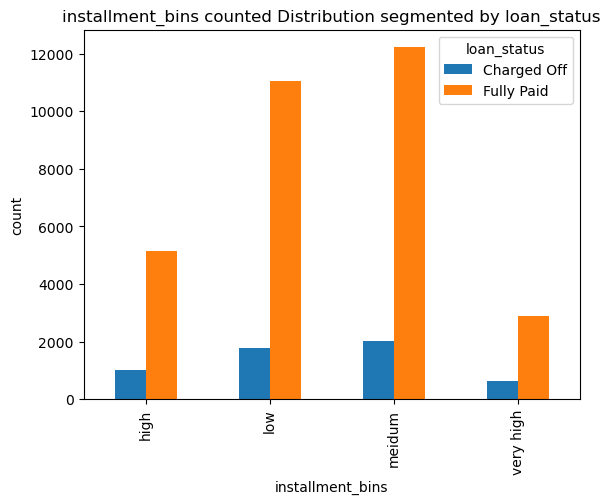

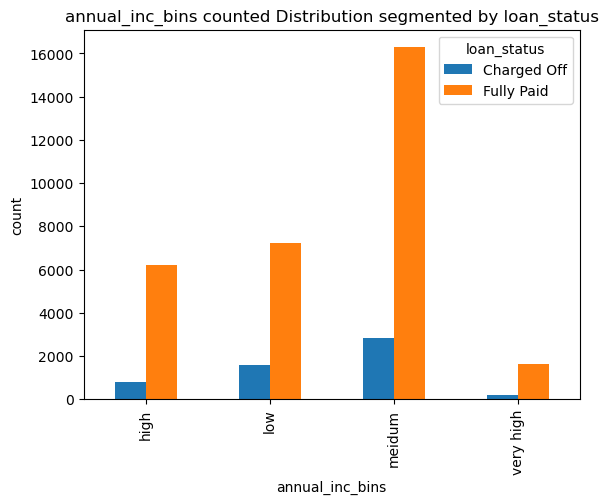

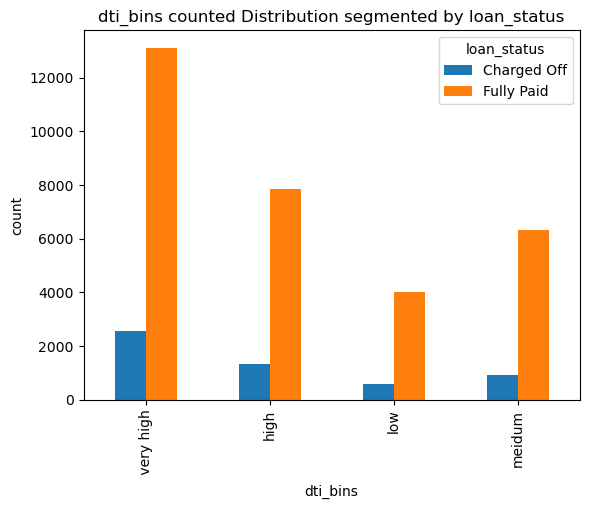

In [62]:
categorical_variables_new = categorical_variables+binned_columns
for column in categorical_variables_new:
     loan_dataset.groupby(column)["loan_status"].value_counts().unstack().iloc[:15].plot.bar()
     plt.title(column+" counted Distribution segmented by loan_status")
     plt.ylabel("count") 

<font color='green'>Comments</font>
1. Counts plot provides same insights as univariate analysis
2. Successfully paid insights looks as a scaled version of charged off
3. We can derive more insights by comparing against rate of default

#### Segmented univariate analysis on continuous variables by loan_status

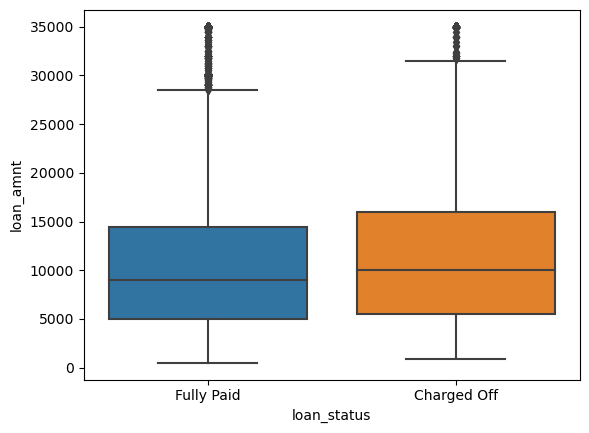

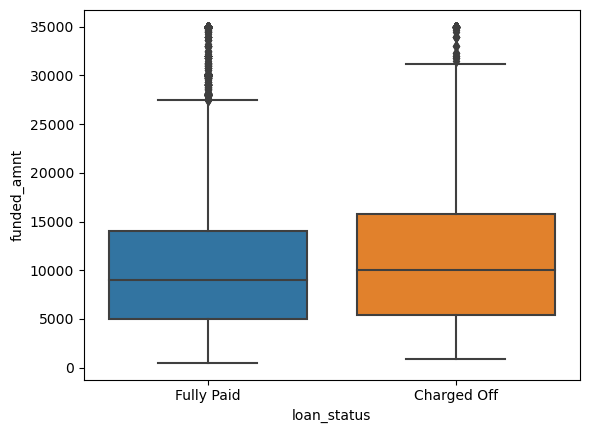

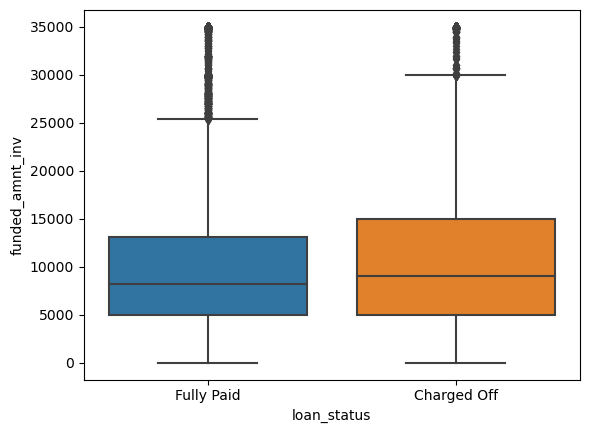

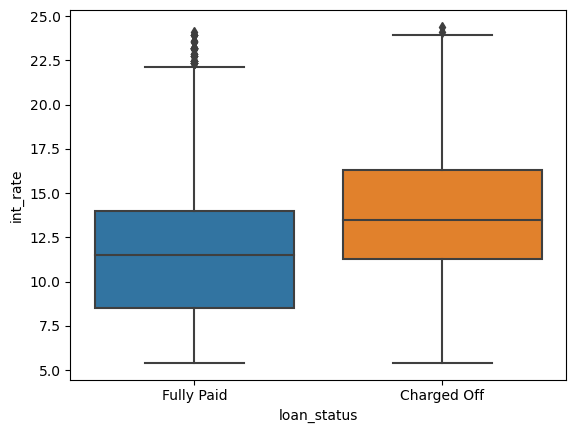

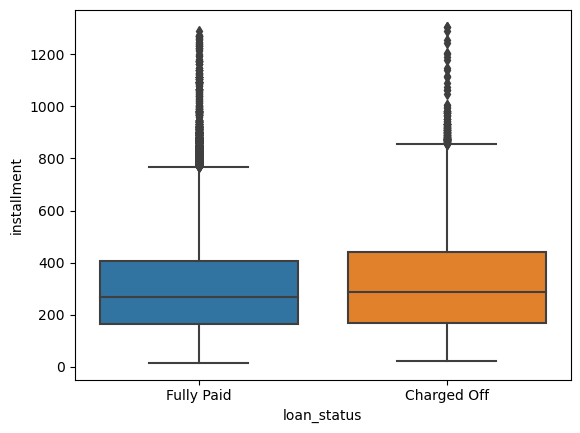

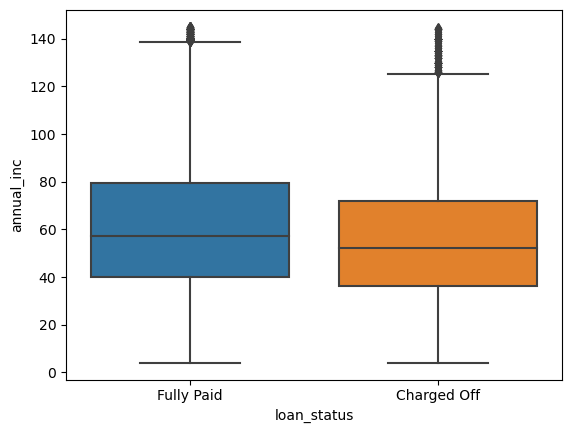

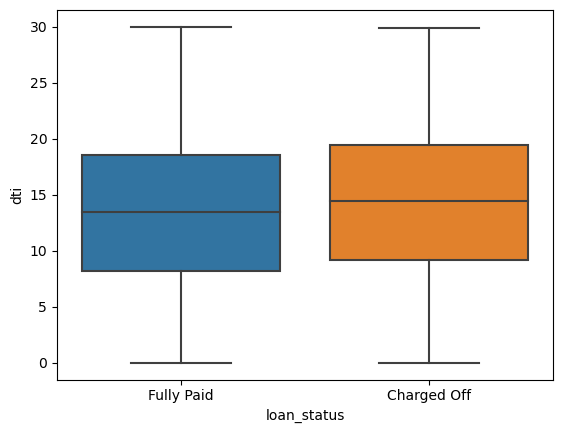

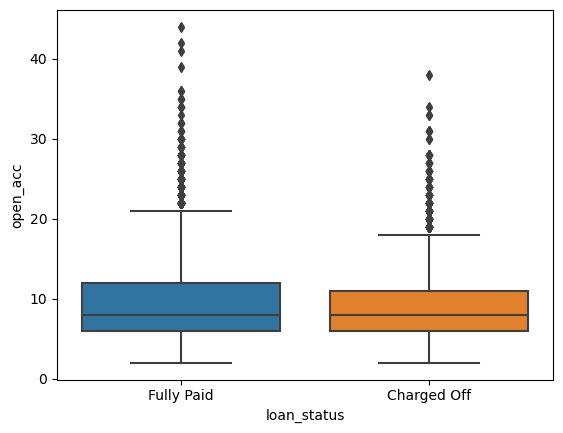

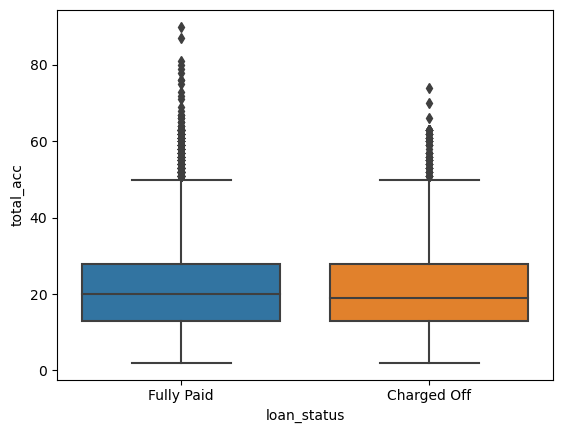

In [63]:
for column in continuous_variables:
    sns.boxplot(x=loan_dataset["loan_status"],y=loan_dataset[column])
    plt.show()

<font color='green'>Insight</font>
1. More Loans are getting charged off at High and Very High loan amount category
2. More Loans are getting charged off at High and Very High interest rate category
3. People at low income category defaulting more loans

### BiVariate Analysis

### Bivariate Analysis on Numerical Variables

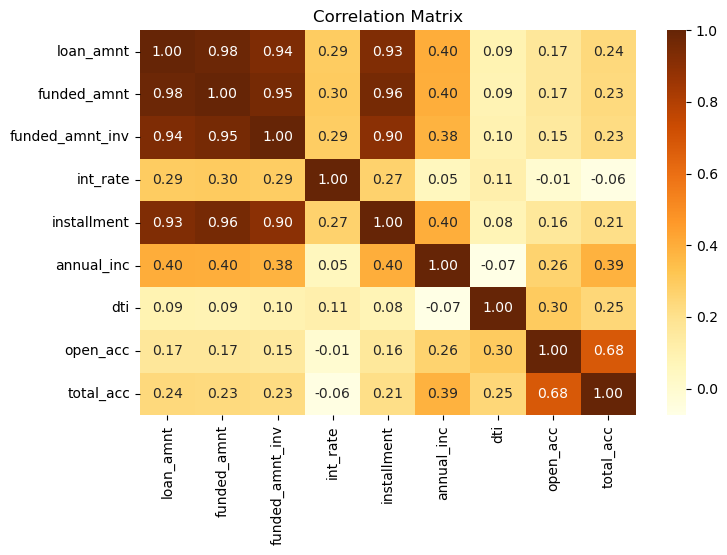

In [64]:
plt.figure(figsize=(8,5))
sns.heatmap(loan_dataset[continuous_variables].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.title("Correlation Matrix")
plt.show()

<font color="Green">Insights</font>
 1. loan_amt,funded_amt,funded_amnt_inv, Installment  are highly positive corelated with each other (>0.9)
2. Annual_income having decent positive correlation with loan_amt,funded_amt,funded_amnt_inv, Installment (~ 0.4)
3. int_rate having decent positive correlation with loan_amt,funded_amt,funded_amnt_inv, Installment (~ 0.3)
4. total_acc decent positive correlation with annual income (~0.4)
5. dti not having much correlation with other variables

### Rate of Default vs Categorical Variables

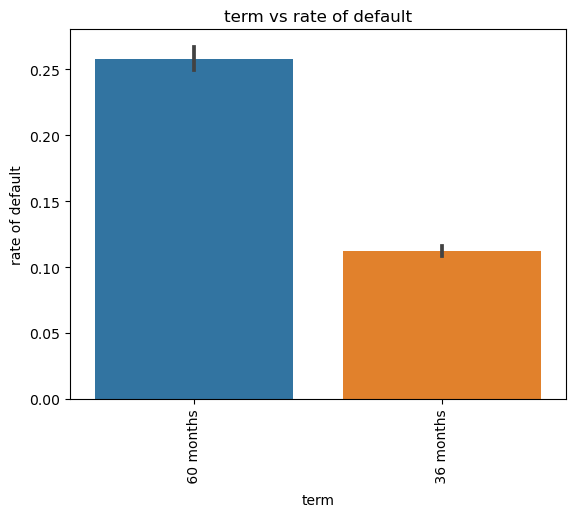

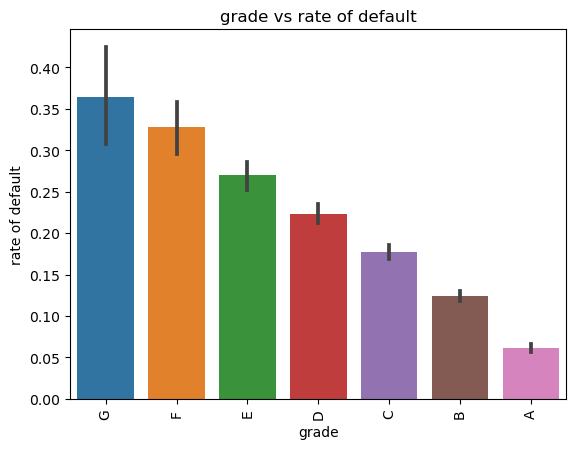

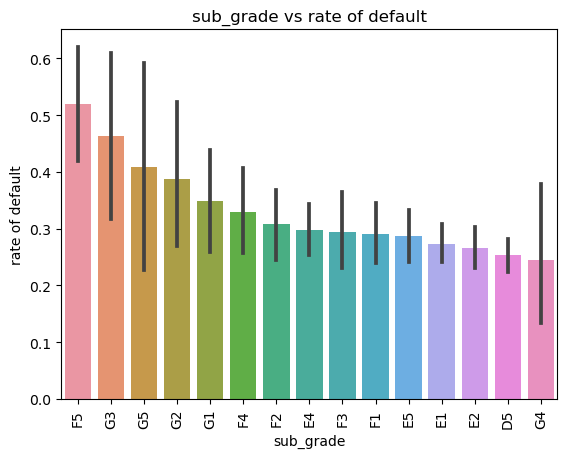

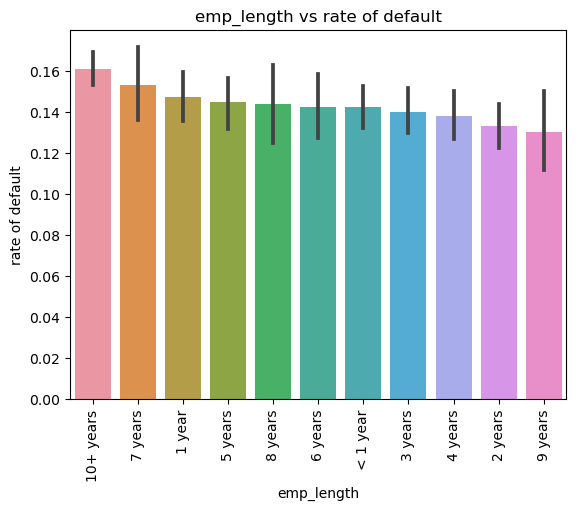

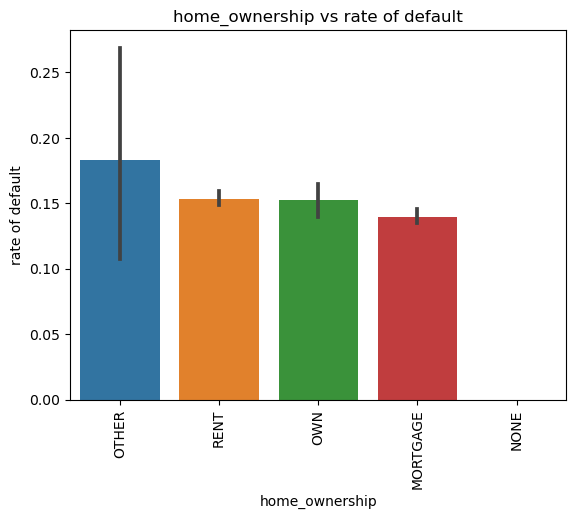

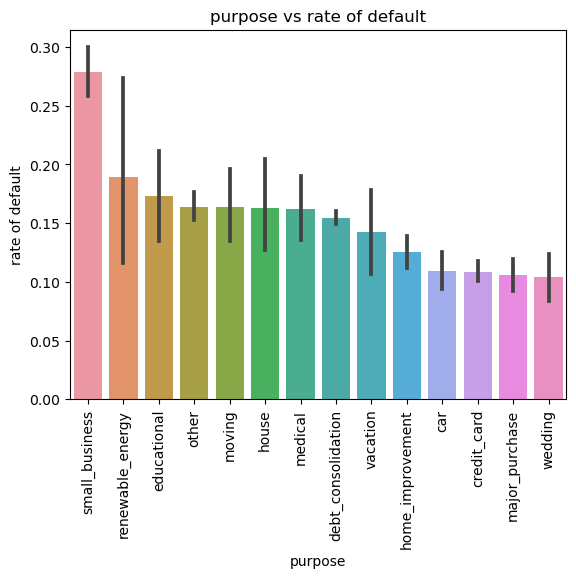

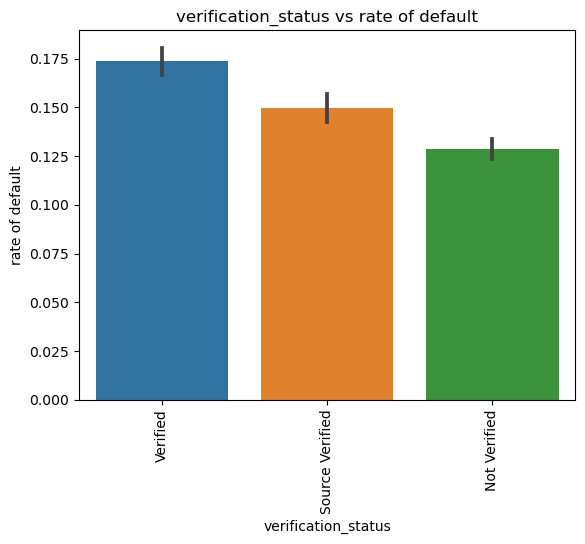

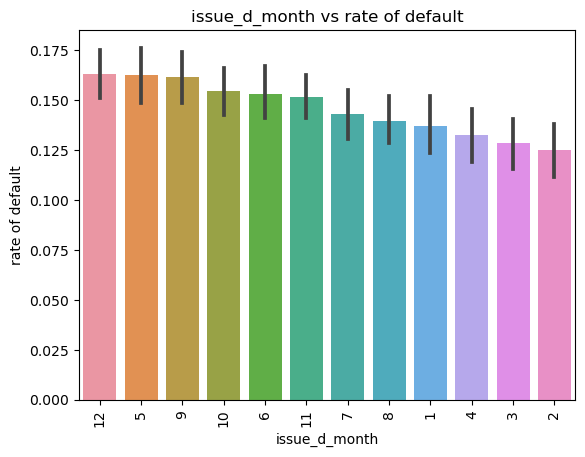

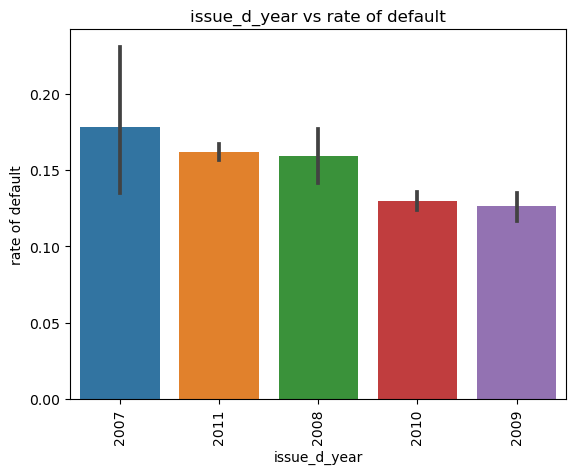

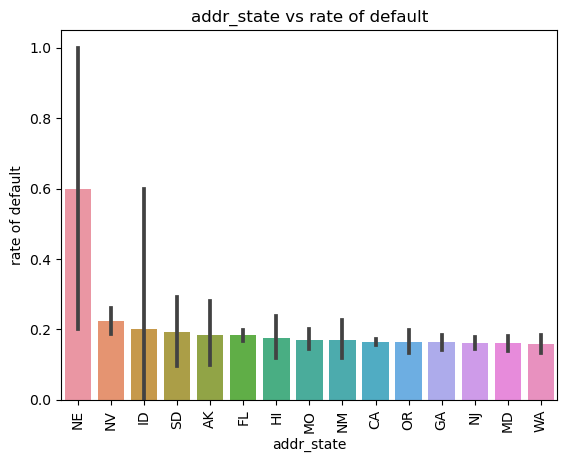

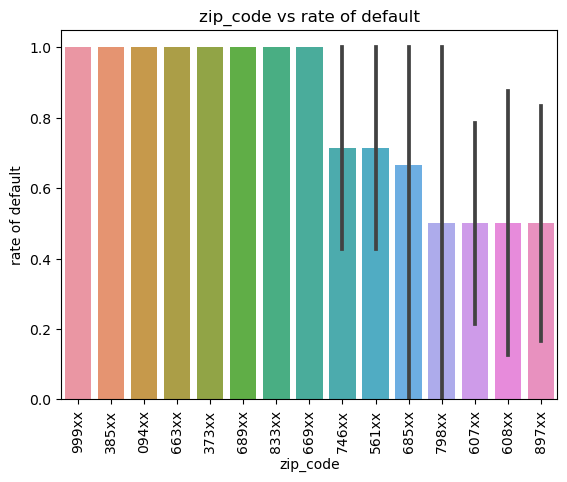

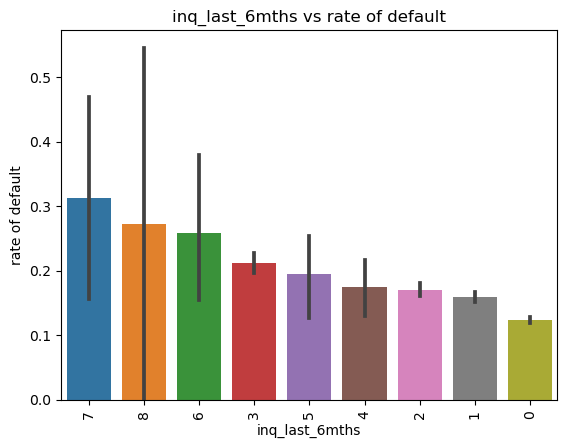

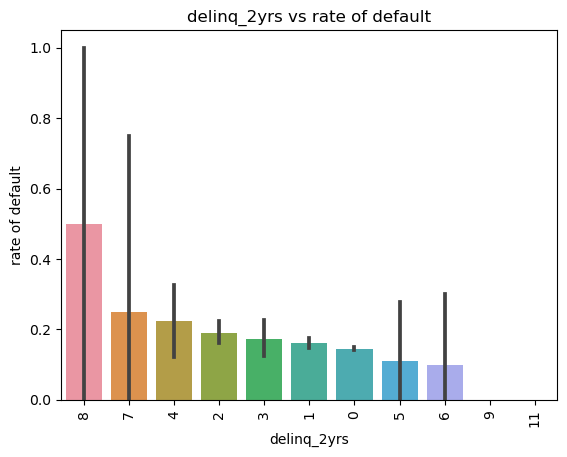

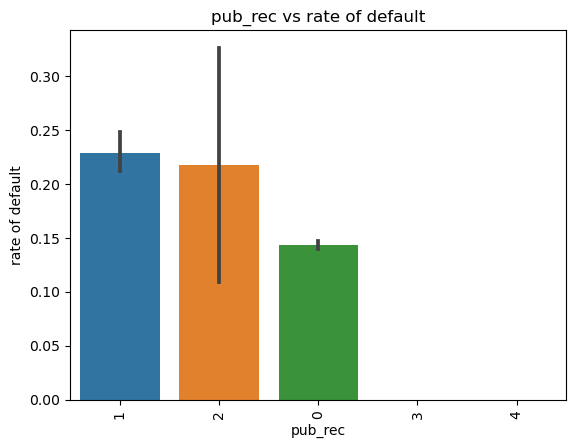

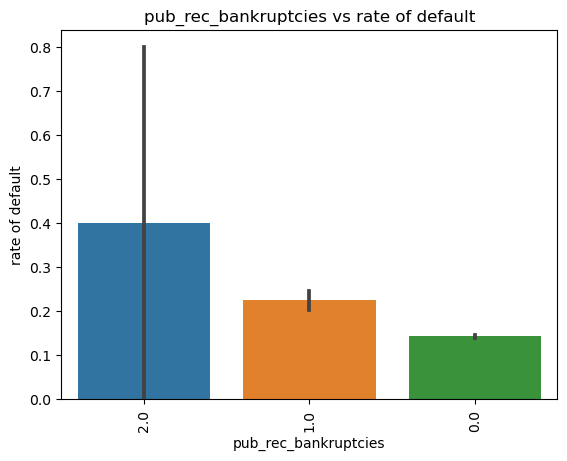

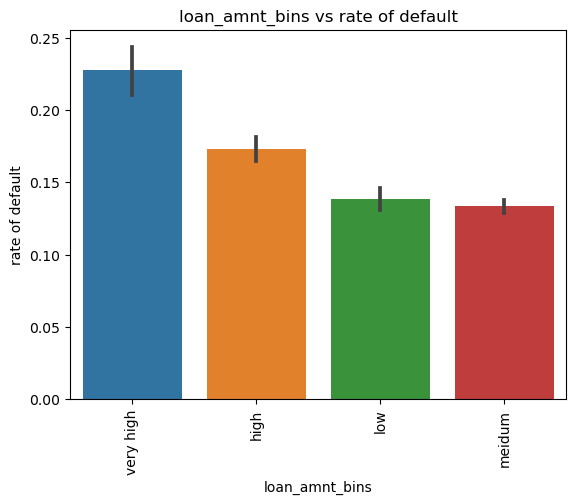

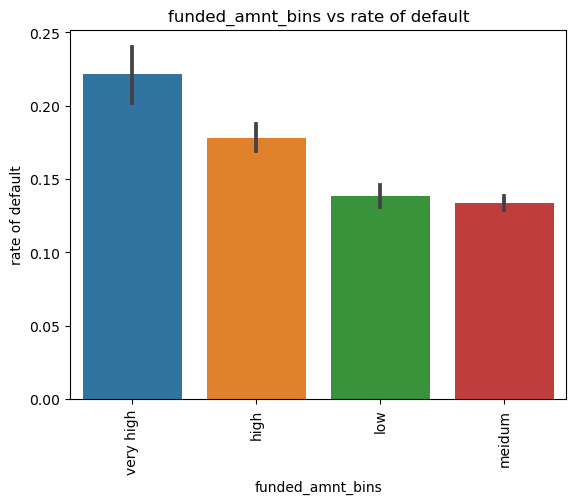

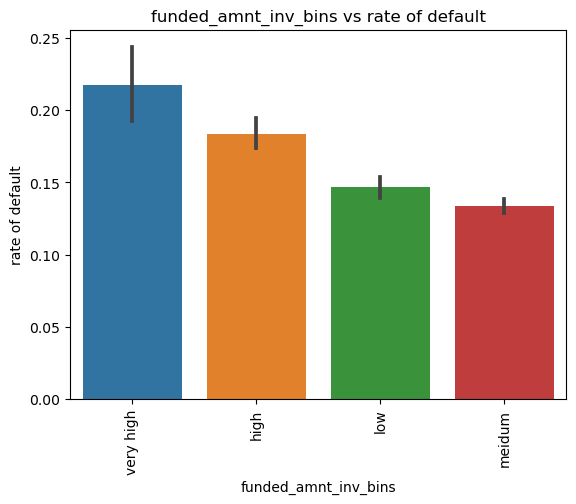

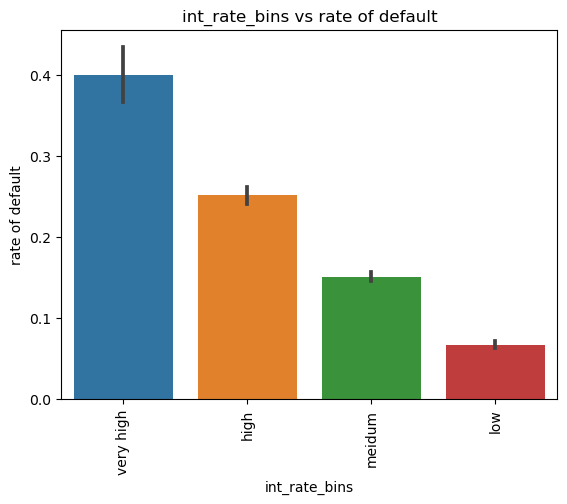

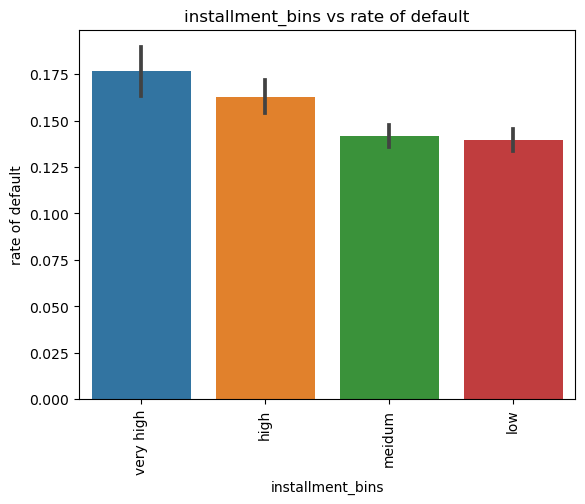

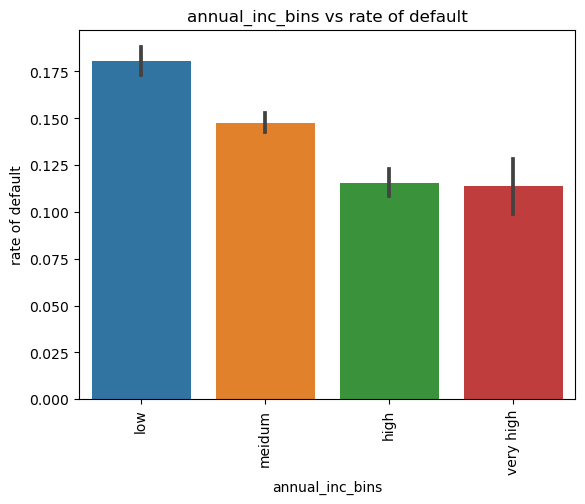

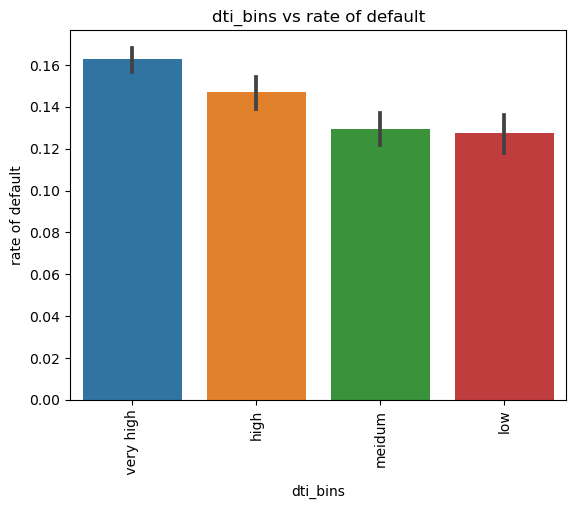

In [65]:

for column in categorical_variables_new:
    temp = loan_dataset.groupby(column)["outcome"].mean().sort_values(ascending=False).iloc[:15]
    sns.barplot(x=loan_dataset[column], y=loan_dataset['outcome'],order=temp.index)
    plt.xticks(rotation=90) 
    plt.title(column+ ' vs rate of default')
    plt.ylabel("rate of default")
    plt.show()

<font color="Green">Insights<font>
1. **term** - Higher Default rate on 60 months term ~26%
2. **grade** - Default rate increase from A to G, risk is increasing from A to G (6 to 36%)
3. **emp_length** - Higher default rate occurs when emp_length 10+. Only  2% diff between lowest to highest default rate
4. **home_ownership** - people with mortgage home_ownership tends to default lesser ~14% compared to highest Other ~18%
5. **purpose** - people taking loans for the purpose small business(27%), renewable_energy(19%), educational(17%) tends to default more
6. **verification_status** - verified tends to default more than unverified people this is unusual needs business attention
7. **loan_amnt, funded_amnt_bins , funded_amnt_inv_bins** - having same patterns. Very High loan Amounts having  default rate 22% compared to medium and low 13%
8. **int_rate** - Default rate increase from low to very High (6 to 40%)
9. **installment** - Default rate increase from low to very high (14 to 18%)
10. **annual_inc** - Default rate **decrease** from low to very high (18 to 11%)
11. **dti** - Default rate increase from low to very high (12 to 16%)
12. **addr_state** - NE, NV,ID, SD, AK, FL ,HI has higher default rate
13. **issue_d** – 2007 had default rate of 18% compared to low on 2009(12%). 2007 might be impacted by economic crisis

#### Bivariate Analysis Continuous vs Categorical variables

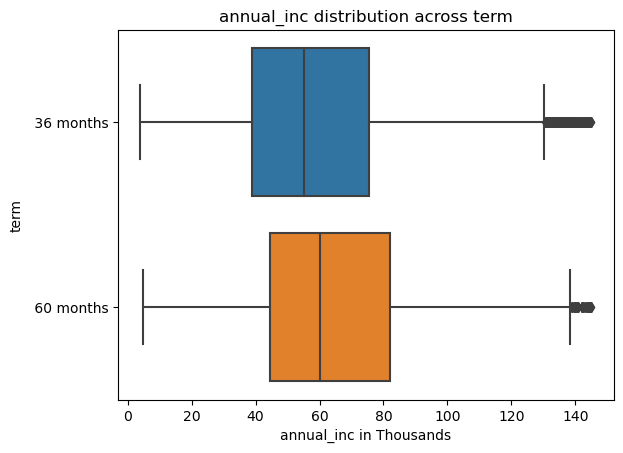

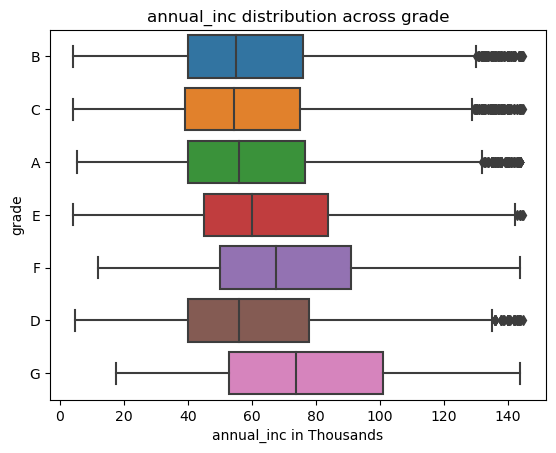

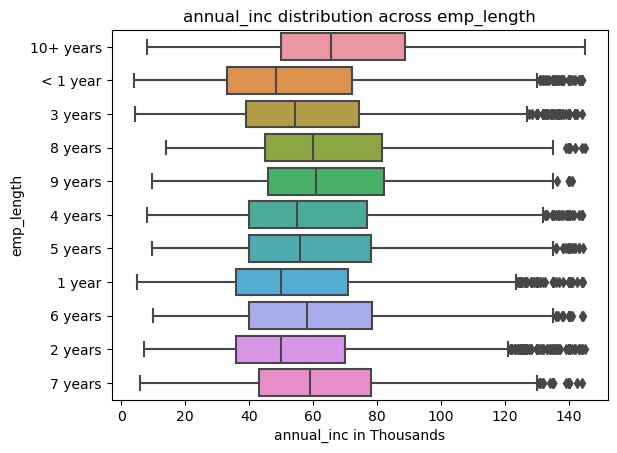

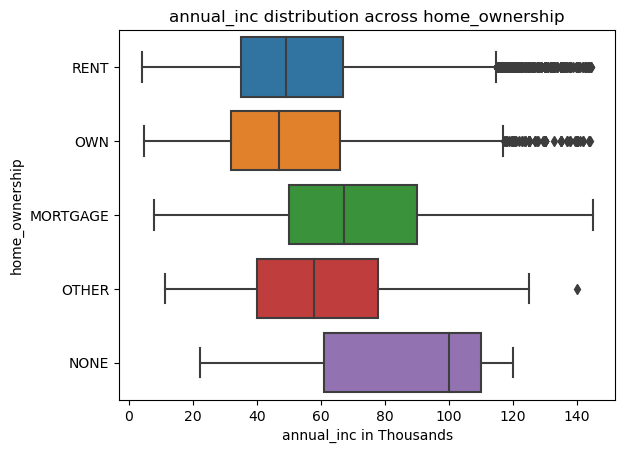

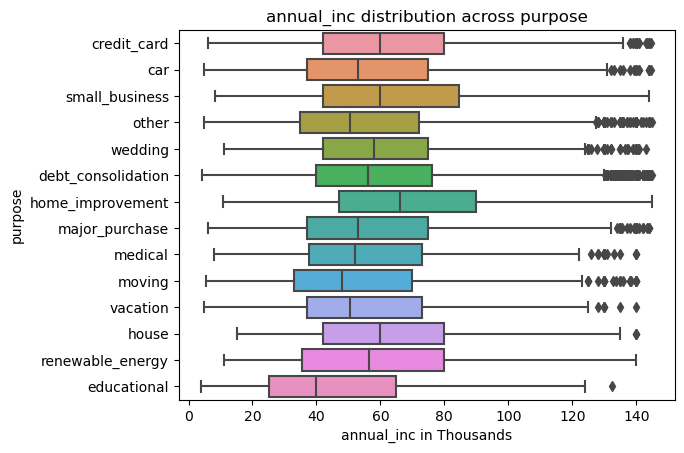

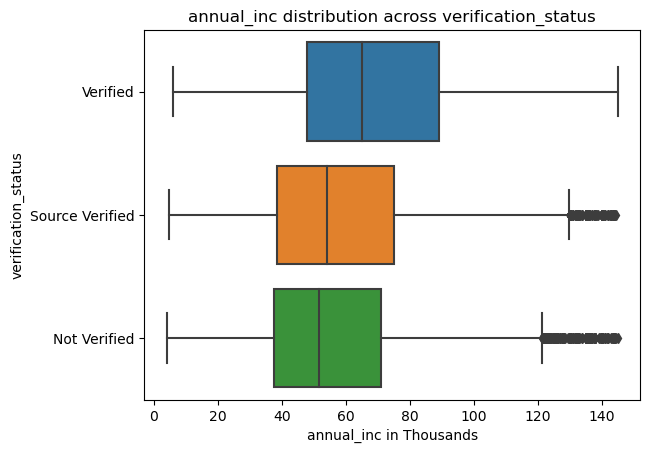

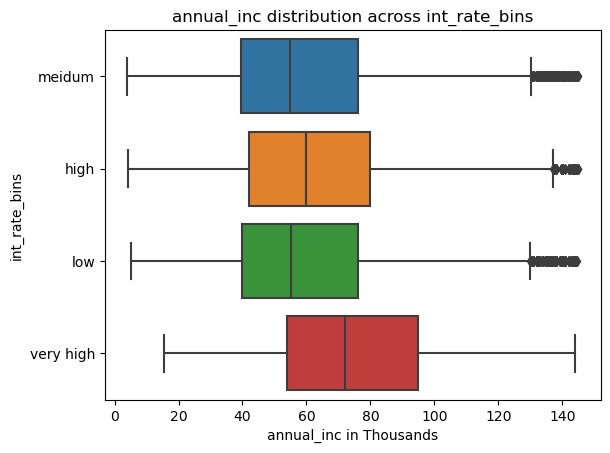

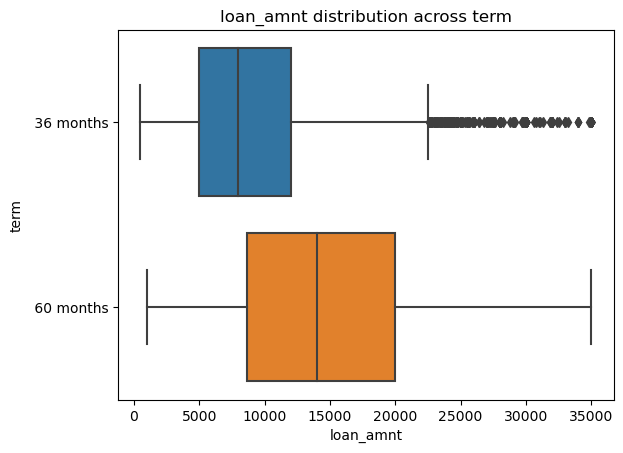

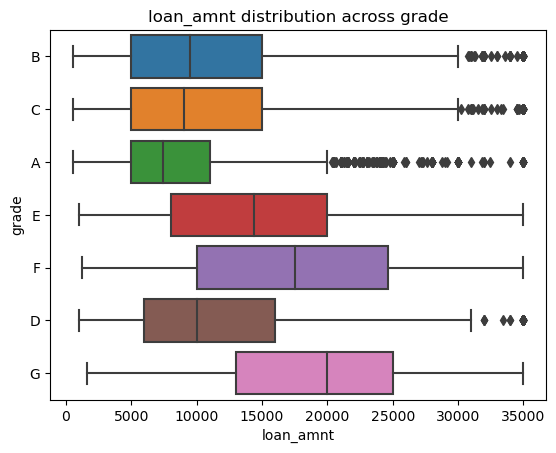

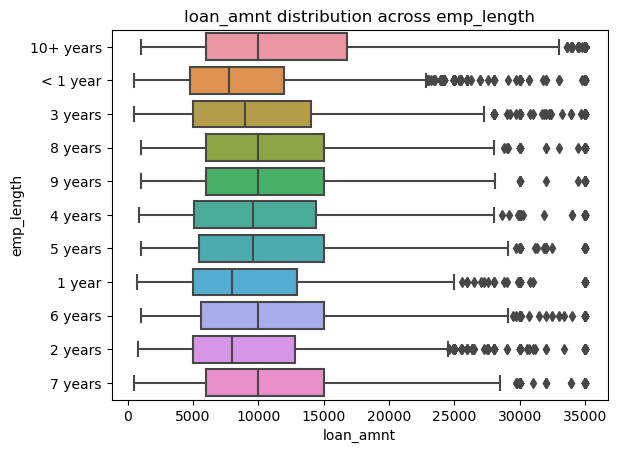

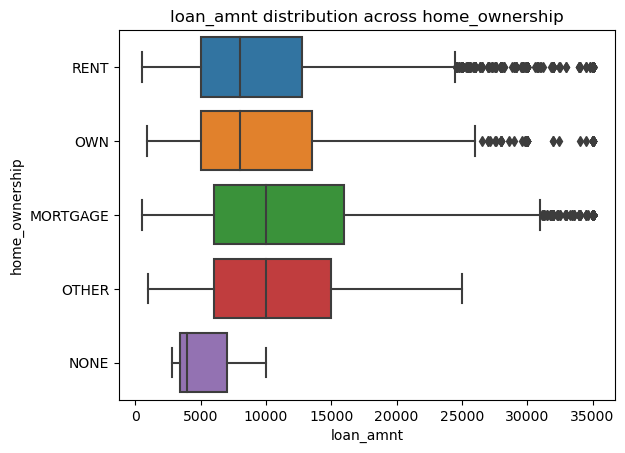

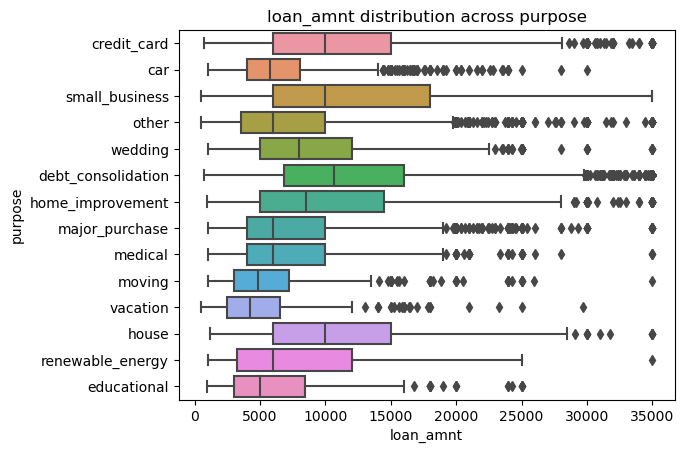

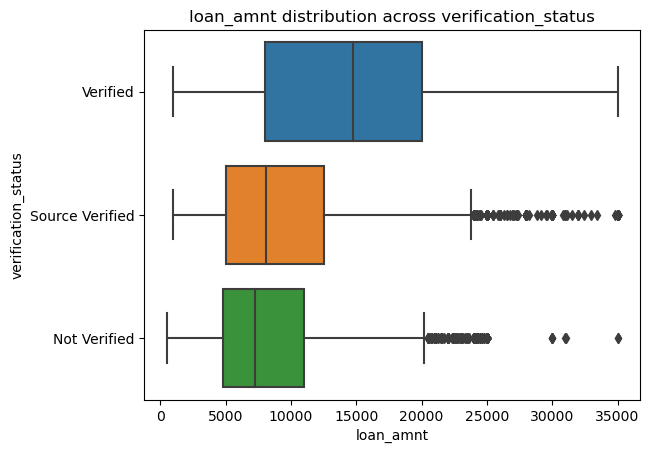

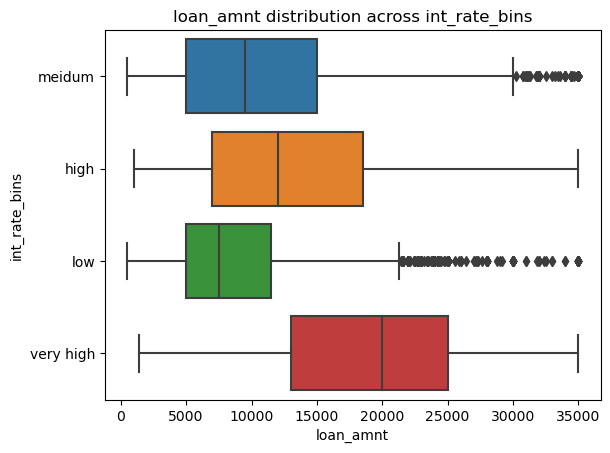

In [66]:
numeric_cols = ["annual_inc","loan_amnt"]
cat_cols = ["term","grade","emp_length","home_ownership","purpose","verification_status","int_rate_bins"]
for col1 in numeric_cols:
      for col2 in cat_cols:
        sns.boxplot(y=loan_dataset[col2],x=loan_dataset[col1])
        plt.title(col1+" distribution across "+col2)
        if col1 =="annual_inc":
            plt.xlabel("annual_inc in Thousands")
        plt.show()

<font color="Green">Insights<font>
1. People with having income range 50 to 100K tends to take more G grade loans
2. People with having income range 40 to 90K tends to take more loans for home improvement and small business
3. 60 months term loan mostly give for High and Very High loan amount category (15 to 35 K)
4. A grade loan given at 5 to 10K loan amount which also why very less default rate on A grade loans
5. People with 10+ tends to takes more loan with high and very loan amount category. Which also explains why more defaulter. High loan amounts tends to default
6. High and Very High Loan amounts taken for the purpose small business, debt consolidation, house, credit cards
7. High and Very High loan amount given with higher interest rates  

### MutiVariate Analysis

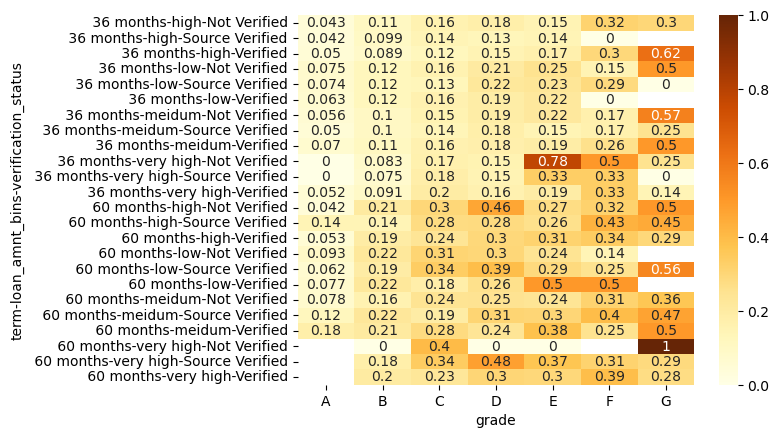

In [67]:
#Multi variate Analysis 1
pivot_data = pd.pivot_table(loan_dataset, values ='outcome',index=['term','loan_amnt_bins','verification_status'], columns='grade')
sns.heatmap(pivot_data, annot=True,cmap="YlOrBr")
plt.yticks(rotation = 0)
plt.show()

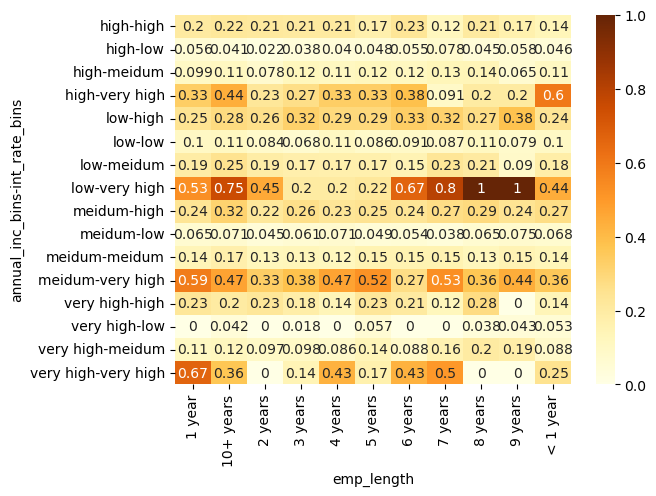

In [68]:
#Multi variate Analysis 2
pivot_data = pd.pivot_table(loan_dataset, values ='outcome',index=['annual_inc_bins','int_rate_bins'], columns='emp_length')
sns.heatmap(pivot_data, annot=True,cmap="YlOrBr")
plt.yticks(rotation = 0)
plt.show()

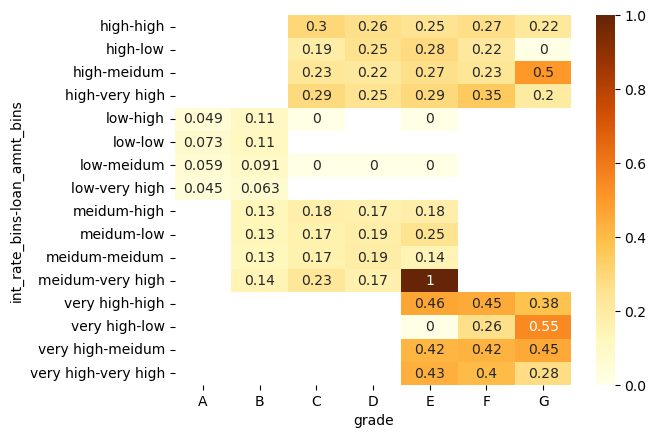

In [69]:
#Multi variate Analysis 3
pivot_data = pd.pivot_table(loan_dataset, values ='outcome',index=['int_rate_bins','loan_amnt_bins'], columns='grade')
sns.heatmap(pivot_data, annot=True,cmap="YlOrBr")
plt.yticks(rotation = 0)
plt.show()

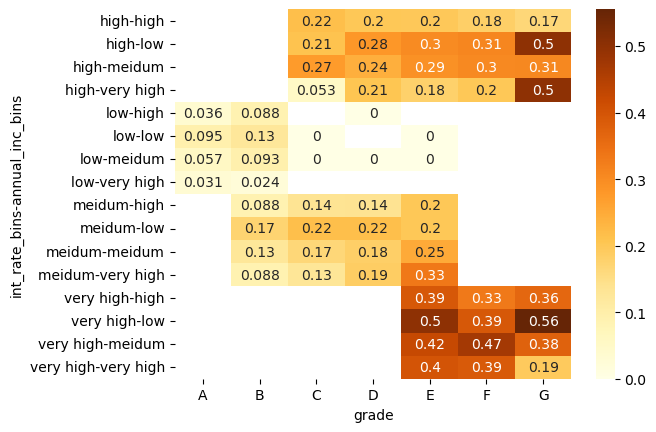

In [70]:
#Multi variate Analysis 4
pivot_data = pd.pivot_table(loan_dataset, values ='outcome',index=['int_rate_bins','annual_inc_bins'], columns='grade')
sns.heatmap(pivot_data, annot=True,cmap="YlOrBr")
plt.yticks(rotation = 0)
plt.show()

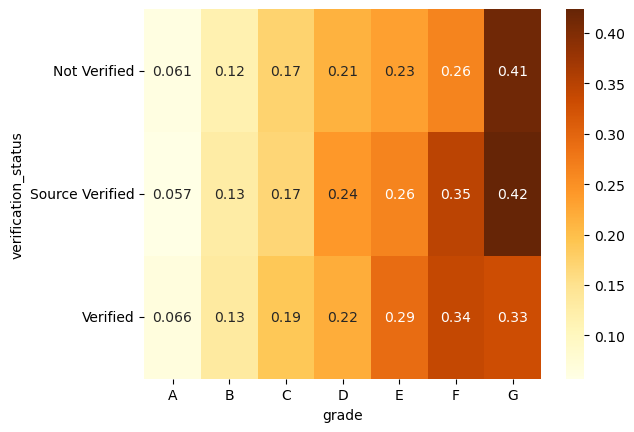

In [71]:
#Multi variate Analysis 5
pivot_data = pd.pivot_table(loan_dataset, values ='outcome',index=['verification_status'], columns='grade')
sns.heatmap(pivot_data, annot=True,cmap="YlOrBr")
plt.yticks(rotation = 0)
plt.show()

<font color="Green">Insights</font>
1. 60 months term loans are defaulted most on the lower grade (E,F,G)
2. 30 months term, high loan amt and not verified E grade defaulted more
3. 10+ years taking very high interest rate loans tends to default more
4. low annual income and very high interest rate tends when experience is <=2(40 to 55%) or >=6(70 to 80%)
5. people with 1 year experience taking vey high interest loan tends to default across all income range
6. Very High interest rate are given E, F, G  category tendency to default irrespective annual_inc and loan_amnt category
7. E, F, G loan grades not verified having more probality to default

### conclusions

Variables influencing Loan Defaulting

|column Name|Column Label| Type| Note|
|------------|-----------|------|-----|
|grade	|grade	|Categorical|	|
|sub_grade|	Sub grade|	Categorical|	|
|Int_rate|	Interest Rate|	Continuous|	|
|loan_amnt|	Loan amount	|Continuous	|funded_amnt_bins, funded_amnt_inv_bins follows same pattern|
|purpose|	Purpose|	Categorica||	
|term|	term|	Categorical|	|
|annual_inc|	Annual income|	Continuous	||
|installment|	Installment Amount|	Continuous	||
|verification_status|	Verification status|	Categorical	||
|home_ownership|	Home ownership	|Categorical	||
|dti|	Debt to income ratio|	Continuous|	
|emp_length|	Employment length|	Categorical	||


#### Trends and Patterns:

1. 14.77 % of the loan application in the data set are defaulted
2. Most loans are taken for the purpose of debt_consolidation, credit_card, home_improvement
3. Most Loans taken at the end of the year at Dec, Nov, Oct
4. Number of loans taken steadily increasing over the years
5. Most loans taken at states California, New York, Florida, Texas
6. More loan taken at 5000 to 15000 loan amount range
7. More loan having interest rate between 10 to 15 %
8. More people taking loans at the income range of 40 to 80 K
9. Loans are concentrated with 100 to 400 range installment amount
10. Most Loans having dti 10 to 20
11. People with having income range 50 to 100K tends to take more G grade loans
12. People with having income range 40 to 90K tends to take more loans for home improvement and small business
13. 60 months term loan mostly given for High and Very High loan amount category (15 to 35 K)
14. A grade loan given at 5 to 10K loan amount which also why very less default rate on A grade loans
15. People with 10+ tends to takes more loan with high and very loan amount category. Which also explains why more defaulter. High loan amounts tends to default
16. High and Very High Loan amounts taken for the purpose small business, debt consolidation, house, credit cards
17. High and Very High loan amount given with higher interest rates


#### Correlations

1. loan_amt,funded_amt,funded_amnt_inv, Installment  are highly positive corelated with each other (>0.9)
2. Annual_income having decent positive correlation with loan_amt,funded_amt,funded_amnt_inv, Installment (~ 0.4)
3. int_rate having decent positive correlation with loan_amt,funded_amt,funded_amnt_inv, Installment (~ 0.3)


#### Default Patterns

1. Grade - Default rate increase from loan grade A to G, risk is increasing from A to G (6 to 36%)
2. int_rate - Default rate increase from low to very High (6 to 40%)
3. annual_inc - Default rate decrease from low to very high (18 to 11%)
4. installment - Default rate increase from low to very high (14 to 18%)
5. Issue Date – 2007 had default rate of 18% compared to low on 2009(12%). 2007 might be impacted by economic crisis
6. Employment Length - Higher default rate occurs when emp_length is 10+ Years. Only  2% diff between lowest to highest default rate
7. dti - Default rate increase from low to very high (12 to 16%)
8. 60 months term loans are defaulted most on the lower grade (E,F,G)
9. 30 months term, high loan amt and not verified E grade defaulted more
10. E, F, G loan grades not verified having more probability to default



#### When did it happen most

1. Grade - G(36%), F(32%), E(26%)
2. Sub Grade – F5(52%),G3(46%),G5(40%),G2(38%) 
3. Interest rate – Very High –(39%) , High (25%)
4. Purpose – small business(27%), renewable_energy(19%), educational(17%)
5. Term -  60 months ~ 26%
6. Address State - NE, NV,ID, SD, AK, FL ,HI 
7. loan_amnt, funded_amnt_bins , funded_amnt_inv_bins - Very High loan Amounts ~22% 
8. Home Ownership -  Other ~18%
9. installment - very High ~18 %
10. dti - very high ~18%


#### When did it happen least

1. Grade - A grade 6%
2. Interest rate - low - 6%
3. Purpose – wedding, credit card ,car - 10%
4. Term -  36 months ~ 11%
5. annual income - very high - 11%
6. dti - low 12%
